**Network Intrusion Detection with PyOD 2: Model Performance Comparison on Cybersecurity Dataset**

**Initial Environment Setup: One-Time Package Installations**

In [1]:
#!pip install -U pyod
#!pip install markdown2
#!pip install pdfkit
#!pip install tabulate

#!pip install openai
#!pip install python-dotenv

`pip install -U pyod:`

- This will install the latest version, which is PyOD2+
- “PyOD2” is an informal reference to pyod version 1.0+ (sometimes called PyOD 2.0).
  
*It includes:*
- Better API design
- Expanded model library
- Deep learning models support (e.g., AutoEncoder, VAE)
- Improved integration with scikit-learn, torch, etc.

`Others`
- `markdown2`: A fast and complete implementation of Markdown in Python, used to convert Markdown text to HTML.
- `pdfkit`: A Python wrapper for `wkhtmltopdf`, which allows us to convert HTML documents to PDF format.
- `tabulate`: A simple library for creating plain-text tables from tabular data such as lists or dictionaries, useful for pretty-printing.  

In [2]:
# import pyod
# print("PyOD version:", pyod.__version__)

**Imports of Libraries and Core Dependencies**
- This section includes all core libraries and helper utilities required across the notebook.

In [3]:
# -----------------------------
# Core Python Libraries
# -----------------------------
import os  # OS interface
import json  # JSON handling
import hashlib  # For hashing (e.g., integrity or ID generation)
import warnings  # Suppress warnings for cleaner output
warnings.filterwarnings("ignore")
from glob import glob  # File pattern matching
from collections import Counter  # Count frequencies of elements
from datetime import datetime  # Handle date and time

# -----------------------------
# Numerical and Data Libraries
# -----------------------------
import numpy as np  # Numerical computing
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Statistical data visualization
from IPython.display import display  # Rich display in Jupyter notebooks

# -----------------------------
# Scientific and Statistical Libraries
# -----------------------------
import scipy.stats as stats  # Statistical functions
import scipy.io  # For working with MATLAB .mat files
from scipy.io import loadmat  # Alternate .mat file loader

# -----------------------------
# Machine Learning Utilities
# -----------------------------
import joblib  # Save/load models and pipelines
from sklearn.pipeline import Pipeline  # For building ML pipelines
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.metrics import (  # Evaluation metrics
    classification_report, roc_auc_score,
    average_precision_score, accuracy_score
)

# -----------------------------
# PyOD: Outlier Detection Library
# -----------------------------
# Core utilities
from pyod.utils.data import generate_data, evaluate_print  # Data generation & evaluation
from pyod.utils.example import visualize  # Visualization helper

# Classic and deep anomaly detection models
from pyod.models.iforest import IForest  # Isolation Forest
from pyod.models.lof import LOF  # Local Outlier Factor
from pyod.models.auto_encoder import AutoEncoder  # Autoencoder-based
from pyod.models.vae import VAE  # Variational Autoencoder
from pyod.models.devnet import DevNet  # Deep Evidential Network
from pyod.models.deep_svdd import DeepSVDD  # Deep SVDD
from pyod.models.lunar import LUNAR  # LUNAR deep anomaly detector

# GAN-based models
from pyod.models.anogan import AnoGAN  # Anomaly GAN
from pyod.models.so_gaal import SO_GAAL  # Single-Objective GAAL
from pyod.models.mo_gaal import MO_GAAL  # Multi-Objective GAAL

# -----------------------------
# Parallel Processing and Progress Bars
# -----------------------------
from concurrent.futures import ProcessPoolExecutor, as_completed  # For multiprocessing
from tqdm import tqdm  # Progress bar for loops
import logging

# -----------------------------
# Reporting and Output Formatting
# -----------------------------
from tabulate import tabulate  # Create pretty text tables

# -----------------------------
# Markdown and PDF Export
# -----------------------------
import markdown2  # Convert markdown to HTML
import pdfkit  # Convert HTML to PDF (requires wkhtmltopdf installed)

# -----------------------------
# OpenAI Integration
# -----------------------------
from openai import OpenAI  # OpenAI API
from dotenv import load_dotenv  # Load environment variables from .env

# -----------------------------
# Miscellaneous
# -----------------------------
#print(os.getcwd())  # Print current working directory


**Import Core Libraries and Models**

In this step, we import all the essential Python libraries and modules required for the full anomaly detection workflow:

- **Data Manipulation and Visualization**  
  `pandas`, `numpy`, `matplotlib`, `seaborn`, `scipy`, and `IPython.display` are used for loading, exploring, and visualizing data.

- **PyOD Utilities and Models**  
  We import PyOD utilities (`generate_data`, `evaluate_print`, `visualize`) and a diverse set of anomaly detection models:
  - **Traditional Models**: Isolation Forest (`IForest`), Local Outlier Factor (`LOF`)
  - **Deep Learning Models**: AutoEncoder, Variational AutoEncoder (`VAE`), DevNet, Deep SVDD, LUNAR
  - **GAN-based Models**: AnoGAN, SO-GAAL, MO-GAAL

- **Scikit-learn Utilities**  
  For model preprocessing, evaluation, and pipeline creation (`StandardScaler`, `Pipeline`, and metrics like `roc_auc_score`, `accuracy_score`, etc.)

- **Parallel and Utility Tools**  
  `concurrent.futures` and `tqdm` are used for parallel processing and progress tracking during model training and evaluation.

- **File and System Operations**  
  `os`, `json`, `hashlib`, `glob`, and `datetime` help with environment setup, file I/O, and metadata management.

- **Output Formatting and Exporting**  
  `tabulate` is used for generating clean tables, while `markdown2` and `pdfkit` enable exporting reports from Markdown to PDF format (requires `wkhtmltopdf` installed).

- **OpenAI Integration**  
  `openai` and `dotenv` are imported to enable use of OpenAI APIs, securely loading keys via environment variables.

- **Clean Output**  
  We suppress warnings using the `warnings` module to maintain clean nd readable notebook output.


**Loading and viewing .mat type of pre-processed files**

In [4]:
# Define .mat file paths
benchmark_datasets_paths = {
    "arrhythmia": "F:/UofA_Contents_21042025/Course10_Capstone_Project/04)OwnCode/Dataset/data all mat/arrhythmia.mat",
    "cardio": "F:/UofA_Contents_21042025/Course10_Capstone_Project/04)OwnCode/Dataset/data all mat/cardio.mat", 
    "ionosphere": "F:/UofA_Contents_21042025/Course10_Capstone_Project/04)OwnCode/Dataset/data all mat/ionosphere.mat", 
    "satellite": "F:/UofA_Contents_21042025/Course10_Capstone_Project/04)OwnCode/Dataset/data all mat/Satellite.mat", 
    "shuttle": "F:/UofA_Contents_21042025/Course10_Capstone_Project/04)OwnCode/Dataset/data all mat/shuttle.mat",
    "glass": "F:/UofA_Contents_21042025/Course10_Capstone_Project/04)OwnCode/Dataset/data all mat/glass.mat",    
    "letter": "F:/UofA_Contents_21042025/Course10_Capstone_Project/04)OwnCode/Dataset/data all mat/letter.mat",
    "lympho": "F:/UofA_Contents_21042025/Course10_Capstone_Project/04)OwnCode/Dataset/data all mat/lympho.mat",
    "mnist": "F:/UofA_Contents_21042025/Course10_Capstone_Project/04)OwnCode/Dataset/data all mat/mnist.mat",
    "musk": "F:/UofA_Contents_21042025/Course10_Capstone_Project/04)OwnCode/Dataset/data all mat/musk.mat",
    "optdigits": "F:/UofA_Contents_21042025/Course10_Capstone_Project/04)OwnCode/Dataset/data all mat/optdigits.mat",
    "pendigits": "F:/UofA_Contents_21042025/Course10_Capstone_Project/04)OwnCode/Dataset/data all mat/pendigits.mat",
    "satimage-2": "F:/UofA_Contents_21042025/Course10_Capstone_Project/04)OwnCode/Dataset/data all mat/satimage-2.mat",
    "vowels": "F:/UofA_Contents_21042025/Course10_Capstone_Project/04)OwnCode/Dataset/data all mat/vowels.mat",
    "wbc": "F:/UofA_Contents_21042025/Course10_Capstone_Project/04)OwnCode/Dataset/data all mat/wbc.mat"
    
}

In [5]:
# Load each into X_... and y_...
for name, path in benchmark_datasets_paths.items():
    mat = scipy.io.loadmat(path)
    X = mat['X']
    y = mat['y'].ravel()
    
    globals()[f"X_{name}"] = X
    globals()[f"y_{name}"] = y
    
    print(f"\n Loaded: {name}")
    print(f"X_{name}.shape: {X.shape}, y_{name}.shape: {y.shape}")
    print(f"Anomaly ratio: {y.mean():.4f}")


 Loaded: arrhythmia
X_arrhythmia.shape: (452, 274), y_arrhythmia.shape: (452,)
Anomaly ratio: 0.1460

 Loaded: cardio
X_cardio.shape: (1831, 21), y_cardio.shape: (1831,)
Anomaly ratio: 0.0961

 Loaded: ionosphere
X_ionosphere.shape: (351, 33), y_ionosphere.shape: (351,)
Anomaly ratio: 0.3590

 Loaded: satellite
X_satellite.shape: (6435, 36), y_satellite.shape: (6435,)
Anomaly ratio: 0.3164

 Loaded: shuttle
X_shuttle.shape: (49097, 9), y_shuttle.shape: (49097,)
Anomaly ratio: 0.0715

 Loaded: glass
X_glass.shape: (214, 9), y_glass.shape: (214,)
Anomaly ratio: 0.0421

 Loaded: letter
X_letter.shape: (1600, 32), y_letter.shape: (1600,)
Anomaly ratio: 0.0625

 Loaded: lympho
X_lympho.shape: (148, 18), y_lympho.shape: (148,)
Anomaly ratio: 0.0405

 Loaded: mnist
X_mnist.shape: (7603, 100), y_mnist.shape: (7603,)
Anomaly ratio: 0.0921

 Loaded: musk
X_musk.shape: (3062, 166), y_musk.shape: (3062,)
Anomaly ratio: 0.0317

 Loaded: optdigits
X_optdigits.shape: (5216, 64), y_optdigits.shape: (

**Load & Stack Raw CICIDS2017 CSV Data into Unified DataFrame**

In [6]:
def load_and_stack_csvs(folder_path, exclude_files=['Monday.csv']):
    """
    Load and stack multiple CSV files from a folder into a single DataFrame.
    Excludes files listed in exclude_files.
    """
    all_dfs = []
    
    for file in os.listdir(folder_path):
        if file.endswith('.csv') and file not in exclude_files:
            print(f"Loading: {file}")
            file_path = os.path.join(folder_path, file)
            df_temp = pd.read_csv(file_path, low_memory=False, encoding='latin1')
            all_dfs.append(df_temp)
    
    # Concatenate all DataFrames
    df_combined = pd.concat(all_dfs, ignore_index=True)
    return df_combined

**Data Loading and Stacking Function**

- To consolidate the CICIDS2017 dataset for analysis, we define a custom function that automatically loads and stacks all daily `.csv` files from a specified folder — **excluding `Monday.csv`**, which contains only benign data and may distort symbolic tagging.

---

**Function: `load_and_stack_csvs(folder_path, exclude_files=[])`**

- This function reads all `.csv` files from the specified directory and stacks them into a single DataFrame.

**Parameters:**

- `folder_path`: The path to the folder where the `.csv` files are located.
- `exclude_files`: List of filenames to skip while loading (default includes `"Monday.csv"`).

**Process:**

1. Iterates through all files in the given folder.
2. Selects only `.csv` files, and skips those listed in `exclude_files`.
3. Reads each file using `pandas.read_csv()` and appends them to a list.
4. Concatenates all individual DataFrames into a single large DataFrame using `pd.concat()`.

**This Is Useful to:**

- Automates merging of daily traffic logs.
- Ensures `Monday.csv` is excluded to preserve dataset balance and tagging.
- Easily reusable for other directory-based datasets.

---

**Creating Dataframe df_cicids for CICIDS2017 external dataset**

In [7]:
# path to our system
data_folder = "F:/UofA_Contents_21042025/Course10_Capstone_Project/04)OwnCode/Dataset/MachineLearningCVE/"
# For external CSV like CICIDS2017 (full dataset)
df_cicids_combined= load_and_stack_csvs(data_folder)
#Clean corrupted characters
df_cicids_combined[' Label'] = df_cicids_combined[' Label'].str.replace('ï¿½', '-', regex=False).str.strip()
df_cicids = df_cicids_combined.copy()

Loading: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Loading: Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Loading: Friday-WorkingHours-Morning.pcap_ISCX.csv
Loading: Monday-WorkingHours.pcap_ISCX.csv
Loading: Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Loading: Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Loading: Tuesday-WorkingHours.pcap_ISCX.csv
Loading: Wednesday-workingHours.pcap_ISCX.csv


In [8]:
def stratified_sample_by_attack_type(df, label_col='Label', target_size=100000, random_state=42):
    """
    Stratified downsampling to preserve class proportions.

    Parameters:
        df (pd.DataFrame): Input DataFrame with a label column.
        label_col (str): Name of the label column.
        target_size (int): Desired total number of samples.
        random_state (int): Seed for reproducibility.

    Returns:
        pd.DataFrame: Stratified sampled DataFrame.
    """
    proportions = df[label_col].value_counts(normalize=True)
    sample_counts = (proportions * target_size).round().astype(int)

    samples = []
    for label, count in sample_counts.items():
        subset = df[df[label_col] == label]
        count = min(count, len(subset))  # Avoid over-sampling
        sampled = subset.sample(n=count, random_state=random_state)
        samples.append(sampled)

    sampled_df = pd.concat(samples).sample(frac=1, random_state=random_state).reset_index(drop=True)
    return sampled_df


In [9]:
# Toggle between full and sampled versions
USE_SAMPLED = True
SELECTED_SAMPLE = '10k'  # Options: '500k', '100k', '50k', 10k...

# Sample cache paths
SAMPLE_PATHS = {
    '100k': "samples/cicids_sample_100000.csv",
    '500k': "samples/cicids_sample_500000.csv",
    '10k': "samples/cicids_sample_10000.csv"
}

SAMPLED_PATH = SAMPLE_PATHS[SELECTED_SAMPLE]

if USE_SAMPLED:
    if os.path.exists(SAMPLED_PATH):        
        df_sampled_cicids = pd.read_csv(SAMPLED_PATH)
        df_cicids = df_sampled_cicids.copy()
        print(f" Loaded cached downsampled CICIDS2017 dataset ({SELECTED_SAMPLE}).")
    else:
        df_sampled_cicids = stratified_sample_by_attack_type(df_cicids, label_col=' Label', 
                                                      target_size=int(SELECTED_SAMPLE.replace('k', '000')))
        os.makedirs("samples", exist_ok=True)
        df_sampled_cicids.to_csv(SAMPLED_PATH, index=False)
        df_cicids = df_sampled_cicids.copy()
        print(f" Created and saved downsampled CICIDS2017 dataset ({SELECTED_SAMPLE}).")
else:
    print(" Using full CICIDS2017 dataset (~2.5M rows).")


 Loaded cached downsampled CICIDS2017 dataset (10k).


In [10]:
df_cicids.shape

(9997, 79)

In [11]:
# Step 1: Compute proportions in both datasets
original_props = df_cicids_combined[' Label'].value_counts(normalize=True).rename("Original_Proportion")
sampled_props = df_sampled_cicids[' Label'].value_counts(normalize=True).rename("Sampled_Proportion")

# Step 2: Merge into a single DataFrame
proportion_comparison = pd.concat([original_props, sampled_props], axis=1).fillna(0)

# Step 3: Add absolute difference (optional)
proportion_comparison["Diff (%)"] = (proportion_comparison["Sampled_Proportion"] - 
                                     proportion_comparison["Original_Proportion"]) * 100

# Step 4: Display nicely
proportion_comparison = proportion_comparison.sort_values("Original_Proportion", ascending=False)
display(proportion_comparison.style.format({
    "Original_Proportion": "{:.4f}",
    "Sampled_Proportion": "{:.4f}",
    "Diff (%)": "{:+.2f}%"
}))


,Original_Proportion,Sampled_Proportion,Diff (%)
Label,,,
BENIGN,0.8030,0.8032,+0.02%
DoS Hulk,0.0816,0.0816,-0.00%
PortScan,0.0561,0.0561,-0.00%
DDoS,0.0452,0.0452,-0.00%
DoS GoldenEye,0.0036,0.0036,-0.00%
FTP-Patator,0.0028,0.0028,-0.00%
SSH-Patator,0.0021,0.0021,+0.00%
DoS slowloris,0.0020,0.0020,-0.00%
DoS Slowhttptest,0.0019,0.0019,-0.00%


**Creating Dataframe df_pima for external pima dataset**

In [12]:
# path to our system
data_folder = "F:/UofA_Contents_21042025/Course10_Capstone_Project/04)OwnCode/Dataset/data all mat/4-pima-indians-diabetes-2.csv"
# For external CSV like pima
df_pima = pd.read_csv(data_folder)

In [13]:
def run_eda(df, stage='initial', label_col='Label', dataset_name='Unnamed Dataset', print_head=True):
    """
    Perform comprehensive EDA diagnostics for any tabular dataset before cleaning.

    Parameters:
        df (pd.DataFrame): Input dataset (e.g., raw .csv or .mat-converted)
        stage (str): Label to indicate EDA phase (e.g., 'initial', 'post-cleaning')
        label_col (str): Column name for target variable (optional, for class distribution)
        dataset_name (str): Name of dataset (used in print logs)
        print_head (bool): Whether to display the top 5 rows

    Returns:
        None (prints diagnostics to console)
    """
    import numpy as np
    import pandas as pd

    print(f"\n EDA Stage: {stage.upper()} | Dataset: {dataset_name}")

    # ① Sample preview
    if print_head:
        print("\n①  Sample Records:")
        display(df.head())

    # ② Shape and columns
    print(f"\n② Shape: {df.shape}")
    print(f"   Columns ({len(df.columns)}): {df.columns.tolist()}")

    # ③ Data types
    print("\n③ Column Type Summary:")
    print(df.dtypes.value_counts())

    # ④ Mixed type detection
    print("\n④ Mixed-Type Detection (e.g., number + string):")
    mixed_cols = [col for col in df.columns if df[col].map(type).nunique() > 1]
    if mixed_cols:
        for col in mixed_cols:
            print(f"    Mixed types in column: {col}")
    else:
        print("    No mixed-type columns detected.")

    # ⑤ Object vs Numeric
    obj_cols = df.select_dtypes(include='object').columns.tolist()
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    print(f"\n⑤ Object Columns: {obj_cols}")
    print(f"   Numeric Columns: {num_cols[:10]}{' ...' if len(num_cols) > 10 else ''}")

    # ⑥ Summary statistics
    print("\n⑥ Summary Statistics (numeric only):")
    display(df.describe(include=[np.number]).T)

    # ⑦ Label distribution
    if label_col in df.columns:
        print(f"\n⑦ Label Distribution in '{label_col}':")
        display(df[label_col].value_counts(normalize=True).rename("Proportion"))
    else:
        print(f"\n⑦ Label column '{label_col}' not found.")

    # ⑧ Missing value summary
    print("\n⑧ Missing Values (non-zero columns):")
    display(df.isnull().sum()[df.isnull().sum() > 0])

    # ⑨ NaN / Inf Summary
    print("\n⑨ NaN / Inf Summary:")
    numeric_df = df.select_dtypes(include=[np.number])
    nan_mask = numeric_df.isna().any(axis=1)
    inf_mask = numeric_df.apply(lambda x: np.isinf(x)).any(axis=1)

    nan_only = nan_mask & ~inf_mask
    inf_only = inf_mask & ~nan_mask
    both = nan_mask & inf_mask
    either = nan_mask | inf_mask

    print(f"   Rows with NaN only: {nan_only.sum()}")
    print(f"   Rows with Inf/-Inf only: {inf_only.sum()}")
    print(f"   Rows with both NaN and Inf/-Inf: {both.sum()}")
    print(f"   Rows with NaN or Inf/-Inf (to be handled): {either.sum()}")

    # ⑩ Duplicate detection (light normalization for accuracy)
    print("\n⑩ Duplicate Row Check (after light normalization):")
    df_temp = df.copy()

    # Normalize text and numeric columns
    df_temp.columns = df_temp.columns.str.strip()
    for col in df_temp.select_dtypes(include='object').columns:
        df_temp[col] = df_temp[col].apply(lambda x: str(x).strip() if isinstance(x, str) else x)

    # Convert numerics in object-type columns (best effort)
    df_temp = df_temp.apply(pd.to_numeric, errors='ignore')
    df_temp.replace([np.inf, -np.inf], np.nan, inplace=True)

    dupes = df_temp.duplicated().sum()
    print(f"   Found {dupes} duplicate rows.")

    # ⑪ Known non-feature columns
    print("\n⑪ Known Non-Feature Columns Check:")
    known_cols = [
        'Flow ID', 'Source IP', 'Destination IP', 'Timestamp',
        'Source Port', 'Destination Port', 'Protocol',
        'PatientID', 'RecordID'
    ]
    detected = [col for col in df.columns if col.strip() in known_cols]
    print(f"    Detected: {detected}" if detected else "    No known non-feature columns.")

    # ⑫ Whitespace in column names
    whitespace_cols = [col for col in df.columns if col != col.strip()]
    if whitespace_cols:
        print(f"\n⑫  Columns with leading/trailing whitespace: {whitespace_cols}")


In [14]:
def clean_data(df, label_col='Label', drop_columns=None, negative_class_name='BENIGN', dataset_name='Unnamed Dataset', verbose=True):
    """
    Clean a dataset for binary classification.

    Parameters:
        df (pd.DataFrame): Input raw DataFrame
        label_col (str): Name of the label column (target)
        drop_columns (list): Columns to drop (e.g., non-features like IDs, timestamps)
        negative_class_name (str): Label to consider as class 0
        dataset_name (str): Name for reporting/logging
        verbose (bool): Print progress if True

    Returns:
        X (np.ndarray): Cleaned feature matrix
        y (np.ndarray): Binary labels (0/1)
        df (pd.DataFrame): Final cleaned DataFrame
    """
    import numpy as np
    import pandas as pd

    df = df.copy()
    print(f"\n Cleaning Stage | Dataset: {dataset_name}")

    # ① Strip column names
    df.columns = df.columns.str.strip()
    if verbose:
        print("① → Column names stripped of whitespace.")

    # ② Detect & log data quality BEFORE dropping anything
    numeric_df = df.select_dtypes(include=[np.number])
    nan_mask = numeric_df.isna().any(axis=1)
    inf_mask = numeric_df.apply(lambda x: np.isinf(x)).any(axis=1)

    nan_only = nan_mask & ~inf_mask
    inf_only = inf_mask & ~nan_mask
    both = nan_mask & inf_mask
    either = nan_mask | inf_mask

    print("② → Data Quality Summary Before Dropping:")
    print(f"    Rows with NaN only: {nan_only.sum()}")
    print(f"    Rows with Inf/-Inf only: {inf_only.sum()}")
    print(f"    Rows with both NaN and Inf/-Inf: {both.sum()}")
    print(f"    Rows with NaN or Inf/-Inf to be dropped: {either.sum()}")

    # ③ Drop rows with any NaN or Inf
    initial_rows = df.shape[0]
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    dropped_nan_inf = initial_rows - df.shape[0]
    if verbose:
        print(f"③ → Dropped {dropped_nan_inf} rows with NaN/Inf.")

    # ④ Drop duplicate rows
    before_dups = df.shape[0]
    df.drop_duplicates(inplace=True)
    dropped_dups = before_dups - df.shape[0]
    if verbose:
        print(f"④ → Dropped {dropped_dups} duplicate rows.")

    # ⑤ Drop known non-feature columns AFTER duplicates
    if drop_columns:
        to_drop = [col for col in drop_columns if col in df.columns]
        df.drop(columns=to_drop, inplace=True)
        if verbose:
            print(f"⑤ → Dropped non-feature columns: {to_drop}")

    # ⑥ Drop zero-variance columns
    zero_var_cols = df.columns[df.nunique() <= 1]
    df.drop(columns=zero_var_cols, inplace=True)
    if verbose and len(zero_var_cols):
        print(f"⑥ → Dropped zero-variance columns: {list(zero_var_cols)}")

    # ⑦ Map label column to binary
    if label_col in df.columns:
        if df[label_col].dtype == 'object':
            df[label_col] = df[label_col].apply(lambda x: 0 if str(x).strip().upper() == negative_class_name.upper() else 1)
        elif sorted(df[label_col].dropna().unique()) != [0, 1]:
            raise ValueError(f"Unexpected values in label column '{label_col}'. Expected binary format.")
    else:
        raise KeyError(f"Label column '{label_col}' not found.")

    # ⑧ Final summary
    y = df[label_col].values
    X = df.drop(columns=[label_col]).values

    print(f"⑦ → Final cleaned shape: {df.shape}")
    print(f"⑧ → Label distribution: {np.bincount(y)}")

    return X, y, df


In [15]:
# For external CSV like CICIDS2017
run_eda(df_cicids, stage='initial', label_col=' Label', dataset_name=':CICIDS2017', print_head=True)


 EDA Stage: INITIAL | Dataset: :CICIDS2017

①  Sample Records:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,255,2,2,56,568,28,28,28.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,53,6971301,2,2,101,272,53,48,50.5,3.535534,...,20,61304.0,0.0,61304,61304,6819663.0,0.0,6819663,6819663,BENIGN
2,53,85049,1,1,53,166,53,53,53.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,53,199,2,2,64,96,32,32,32.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,80,6202,2,0,12,0,6,6,6.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN



② Shape: (9997, 79)
   Columns (79): [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag 

,count,mean,std,min,25%,50%,75%,max
Destination Port,9997.0,7.964575e+03,1.815707e+04,0.0,53.0,80.0,443.0,65439.0
Flow Duration,9997.0,1.484010e+07,3.370678e+07,0.0,157.0,31525.0,3641623.0,119998767.0
Total Fwd Packets,9997.0,2.668250e+01,2.067272e+03,1.0,2.0,2.0,5.0,206687.0
Total Backward Packets,9997.0,3.401881e+01,2.817979e+03,0.0,1.0,2.0,4.0,281741.0
Total Length of Fwd Packets,9997.0,6.516736e+02,1.267174e+04,0.0,12.0,62.0,191.0,1231684.0
...,...,...,...,...,...,...,...,...
Active Min,9997.0,6.246773e+04,5.889734e+05,0.0,0.0,0.0,0.0,30680030.0
Idle Mean,9997.0,8.196338e+06,2.333692e+07,0.0,0.0,0.0,0.0,120000000.0
Idle Std,9997.0,4.872942e+05,4.445307e+06,0.0,0.0,0.0,0.0,63500000.0
Idle Max,9997.0,8.561557e+06,2.403524e+07,0.0,0.0,0.0,0.0,120000000.0



⑦ Label Distribution in ' Label':


 Label
BENIGN                      0.803241
DoS Hulk                    0.081624
PortScan                    0.056117
DDoS                        0.045214
DoS GoldenEye               0.003601
FTP-Patator                 0.002801
SSH-Patator                 0.002101
DoS slowloris               0.002001
DoS Slowhttptest            0.001901
Bot                         0.000700
Web Attack - Brute Force    0.000500
Web Attack - XSS            0.000200
Name: Proportion, dtype: float64


⑧ Missing Values (non-zero columns):


Flow Bytes/s    5
dtype: int64


⑨ NaN / Inf Summary:
   Rows with NaN only: 0
   Rows with Inf/-Inf only: 1
   Rows with both NaN and Inf/-Inf: 5
   Rows with NaN or Inf/-Inf (to be handled): 6

⑩ Duplicate Row Check (after light normalization):
   Found 210 duplicate rows.

⑪ Known Non-Feature Columns Check:
    Detected: [' Destination Port']

⑫  Columns with leading/trailing whitespace: [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', ' Bwd Packets/s',

In [16]:
non_feature_cols_cicids = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp',
                           'Source Port', 'Destination Port', 'Protocol']


X_cicids, y_cicids, df_clean_cicids = clean_data(
    df_cicids,
    label_col='Label',
    drop_columns=non_feature_cols_cicids,    
    negative_class_name='BENIGN',
    dataset_name='CICIDS2017'
)


 Cleaning Stage | Dataset: CICIDS2017
① → Column names stripped of whitespace.
② → Data Quality Summary Before Dropping:
    Rows with NaN only: 0
    Rows with Inf/-Inf only: 1
    Rows with both NaN and Inf/-Inf: 5
    Rows with NaN or Inf/-Inf to be dropped: 6
③ → Dropped 6 rows with NaN/Inf.
④ → Dropped 208 duplicate rows.
⑤ → Dropped non-feature columns: ['Destination Port']
⑥ → Dropped zero-variance columns: ['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
⑦ → Final cleaned shape: (9783, 70)
⑧ → Label distribution: [7972 1811]


**Execute Data Cleaning Process and Prepare X, y, df_clean**

**EDA Stage 1 pima dataset**

In [17]:
# For external CSV like pima
run_eda(df_pima, stage='initial', label_col='class', dataset_name=':PIMA', print_head=True)


 EDA Stage: INITIAL | Dataset: :PIMA

①  Sample Records:


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



② Shape: (768, 9)
   Columns (9): ['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

③ Column Type Summary:
int64      7
float64    2
Name: count, dtype: int64

④ Mixed-Type Detection (e.g., number + string):
    No mixed-type columns detected.

⑤ Object Columns: []
   Numeric Columns: ['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

⑥ Summary Statistics (numeric only):


,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00



⑦ Label Distribution in 'class':


class
0    0.651042
1    0.348958
Name: Proportion, dtype: float64


⑧ Missing Values (non-zero columns):


Series([], dtype: int64)


⑨ NaN / Inf Summary:
   Rows with NaN only: 0
   Rows with Inf/-Inf only: 0
   Rows with both NaN and Inf/-Inf: 0
   Rows with NaN or Inf/-Inf (to be handled): 0

⑩ Duplicate Row Check (after light normalization):
   Found 0 duplicate rows.

⑪ Known Non-Feature Columns Check:
    No known non-feature columns.


**EDA Stage 2 pima dataset**

In [18]:
# columns to drop if not useful
non_feature_cols_pima = [
    'PatientID',           # unique identifier
    'RecordID',            # another possible unique ID
    'VisitDate',           # timestamp-like value
    'HospitalID',          # institution code
    'DoctorID',            # specific to clinician
    'Timestamp',           # visit or record timestamp
    'Name',                # identifiable personal info
    'Gender',              # sometimes may be excluded if not relevant
    'Outcome'              # target label, not used as input
]

In [19]:
X_pima, y_pima, df_clean_pima = clean_data(
    df_pima,
    label_col='class',
    drop_columns=non_feature_cols_pima,   
    negative_class_name='class',
    dataset_name='PIMA'    
)


 Cleaning Stage | Dataset: PIMA
① → Column names stripped of whitespace.
② → Data Quality Summary Before Dropping:
    Rows with NaN only: 0
    Rows with Inf/-Inf only: 0
    Rows with both NaN and Inf/-Inf: 0
    Rows with NaN or Inf/-Inf to be dropped: 0
③ → Dropped 0 rows with NaN/Inf.
④ → Dropped 0 duplicate rows.
⑤ → Dropped non-feature columns: []
⑦ → Final cleaned shape: (768, 9)
⑧ → Label distribution: [500 268]


**Dataset Profiling & Symbolic Tag Assignment Function**

In [20]:
def dataset_tagging_engine(X, y, dataset_name="Unknown", use_hybrid_logic=False, display_summary=True):
    """
    Dataset Tagging Engine:
    Analyze and profile datasets to assign symbolic tags for downstream anomaly detection tasks.

    Parameters:
    ----------
    X : np.ndarray
        Feature matrix of shape (n_samples, n_features)
    
    y : np.ndarray
        Label vector (0 = normal, 1 = anomaly)

    dataset_name : str, default="Unknown"
        Name of the dataset for identification and profiling
    
    use_hybrid_logic : bool, default=True
        If True, use both average and feature percentage logic for skewness/kurtosis tagging.
        If False, use only feature percentage logic.

    display_summary : bool, default=True
        If True, prints dataset summary and assigned tags.

    Returns:
    -------
    profile_dict : dict
        {
            'dataset': dataset_name,
            'tags': [...],           # list of assigned symbolic tags
            'metrics': pd.DataFrame  # summary metrics as a table
        }
    """
 
    # Basic stats
    n_samples, n_features = X.shape
    anomaly_ratio = np.mean(y)
    missing_ratio = np.isnan(X).sum() / X.size
    zero_ratio = (X == 0).sum() / X.size

    # Skewness and kurtosis calculation (per feature)
    skewness = stats.skew(X, axis=0, nan_policy="omit")
    kurtosis = stats.kurtosis(X, axis=0, nan_policy="omit")
    
    avg_skew = np.nanmean(np.abs(skewness))
    avg_kurt = np.nanmean(np.abs(kurtosis))

    # Explanation:
    # pct_high_skew means % of features with |skewness| > 2.0
    # pct_high_kurt means % of features with |kurtosis| > 7.0
    pct_high_skew = np.sum(np.abs(skewness) > 2.0) / len(skewness) * 100
    pct_high_kurt = np.sum(np.abs(kurtosis) > 7.0) / len(kurtosis) * 100

    tags = []

    # Sample size tags
    if n_samples <= 500:
        tags.append("small_sample")
    elif n_samples <= 5000:
        tags.append("medium_sample")
    else:
        tags.append("large_sample")

    # Dimensionality tags
    if n_features <= 10:
        tags.append("low_dimensional")
    elif n_features <= 100:
        tags.append("medium_dimensional")
    else:
        tags.append("high_dimensional")

    # Imbalance tag
    if anomaly_ratio < 0.05:
        tags.append("highly_imbalanced")
    elif anomaly_ratio < 0.20:
        tags.append("imbalanced")
    else:
        tags.append("balanced")

    # Missing value tag
    tags.append("missing_data" if missing_ratio > 0 else "clean_data")

    # Skewness tag logic
    if use_hybrid_logic:
        # Hybrid: High skew if avg > 2.0 or >20% features exceed threshold
        if avg_skew > 2.0 or pct_high_skew > 20:
            tags.append("high_skewness")
        elif avg_skew < 1.0 and pct_high_skew < 5:
            tags.append("low_skewness")
    else:
        if pct_high_skew > 20:
            tags.append("high_skewness")
        elif pct_high_skew < 5:
            tags.append("low_skewness")

    # Kurtosis tag logic
    if use_hybrid_logic:
        if avg_kurt > 7.0 or pct_high_kurt > 20:
            tags.append("high_kurtosis")
        elif avg_kurt < 4.0 and pct_high_kurt < 5:
            tags.append("low_kurtosis")
    else:
        if pct_high_kurt > 20:
            tags.append("high_kurtosis")
        elif pct_high_kurt < 5:
            tags.append("low_kurtosis")

    # Sparsity tags
    if zero_ratio > 0.95:
        tags.append("very_sparse")
    elif zero_ratio > 0.75:
        tags.append("sparse")

    # All datasets are structured/tabular
    tags.append("structured_data")

    # Build metric summary DataFrame
    metrics_df = pd.DataFrame({
        "Metric": [
            "n_samples", "n_features", "anomaly_ratio",
            "missing_value_ratio", "avg_skewness", "avg_kurtosis",
            "% features with skew > 2.0", "% features with kurtosis > 7.0",
            "sparsity_ratio"
        ],
        "Value": [
            n_samples, n_features, round(anomaly_ratio, 6),
            round(missing_ratio, 6), round(avg_skew, 4), round(avg_kurt, 4),
            round(pct_high_skew, 2), round(pct_high_kurt, 2),
            round(zero_ratio, 4)
        ]
    })

    # Optional console output
    if display_summary:
        print(f"\n Dataset Tagging Engine Summary — {dataset_name}")
        display(metrics_df)
        print(f"\n Assigned Tags: {tags}")

    return {
        "dataset": dataset_name,
        "tags": tags,
        "metrics": metrics_df
    }


In [21]:
# Step 1: Define dataset mappings
benchmark_datasets = {
    "arrhythmia": (X_arrhythmia, y_arrhythmia),
    "cardio": (X_cardio, y_cardio),
    "ionosphere": (X_ionosphere, y_ionosphere),
    "satellite": (X_satellite, y_satellite),
    "shuttle": (X_shuttle, y_shuttle),
    "glass": (X_glass, y_glass),
    "letter": (X_letter, y_letter),
    "lympho": (X_lympho, y_lympho),
    "mnist": (X_mnist, y_mnist),
    "musk": (X_musk, y_musk),
    "optdigits": (X_optdigits, y_optdigits),
    "pendigits": (X_pendigits, y_pendigits),
    #"satimage-2": (X_satimage-2, y_satimage-2),
    "vowels": (X_vowels, y_vowels),
    "wbc": (X_wbc, y_wbc),
    
}

external_datasets = {
    "CICIDS2017": (X_cicids, y_cicids),
    "PIMA": (X_pima, y_pima)
}

# Step 2: Tag all datasets
all_profiles = {}

# Benchmark datasets
for name, (X, y) in benchmark_datasets.items():
    profile = dataset_tagging_engine(X, y, dataset_name=name, display_summary=True)
    all_profiles[name] = profile

# External datasets
for name, (X, y) in external_datasets.items():
    profile = dataset_tagging_engine(X, y, dataset_name=name, display_summary=True)
    all_profiles[name] = profile

# Step 3: Optional display of all tags
print("\n All Dataset Tags Summary")
for name, profile in all_profiles.items():
    print(f"- {name}: {profile['tags']}")



 Dataset Tagging Engine Summary — arrhythmia


,Metric,Value
0,n_samples,452.000000
1,n_features,274.000000
2,anomaly_ratio,0.146018
3,missing_value_ratio,0.000000
4,avg_skewness,6.183800
5,avg_kurtosis,85.188100
6,% features with skew > 2.0,56.930000
7,% features with kurtosis > 7.0,59.490000
8,sparsity_ratio,0.543000



 Assigned Tags: ['small_sample', 'high_dimensional', 'imbalanced', 'clean_data', 'high_skewness', 'high_kurtosis', 'structured_data']

 Dataset Tagging Engine Summary — cardio


,Metric,Value
0,n_samples,1831.000000
1,n_features,21.000000
2,anomaly_ratio,0.096122
3,missing_value_ratio,0.000000
4,avg_skewness,2.274400
5,avg_kurtosis,20.273300
6,% features with skew > 2.0,28.570000
7,% features with kurtosis > 7.0,28.570000
8,sparsity_ratio,0.000000



 Assigned Tags: ['medium_sample', 'medium_dimensional', 'imbalanced', 'clean_data', 'high_skewness', 'high_kurtosis', 'structured_data']

 Dataset Tagging Engine Summary — ionosphere


,Metric,Value
0,n_samples,351.000000
1,n_features,33.000000
2,anomaly_ratio,0.358974
3,missing_value_ratio,0.000000
4,avg_skewness,0.612700
5,avg_kurtosis,0.632000
6,% features with skew > 2.0,3.030000
7,% features with kurtosis > 7.0,0.000000
8,sparsity_ratio,0.092400



 Assigned Tags: ['small_sample', 'medium_dimensional', 'balanced', 'clean_data', 'low_skewness', 'low_kurtosis', 'structured_data']

 Dataset Tagging Engine Summary — satellite


,Metric,Value
0,n_samples,6435.000000
1,n_features,36.000000
2,anomaly_ratio,0.316395
3,missing_value_ratio,0.000000
4,avg_skewness,0.427700
5,avg_kurtosis,0.769100
6,% features with skew > 2.0,0.000000
7,% features with kurtosis > 7.0,0.000000
8,sparsity_ratio,0.000000



 Assigned Tags: ['large_sample', 'medium_dimensional', 'balanced', 'clean_data', 'low_skewness', 'low_kurtosis', 'structured_data']

 Dataset Tagging Engine Summary — shuttle


,Metric,Value
0,n_samples,49097.000000
1,n_features,9.000000
2,anomaly_ratio,0.071511
3,missing_value_ratio,0.000000
4,avg_skewness,6.958400
5,avg_kurtosis,1814.445800
6,% features with skew > 2.0,55.560000
7,% features with kurtosis > 7.0,77.780000
8,sparsity_ratio,0.221600



 Assigned Tags: ['large_sample', 'low_dimensional', 'imbalanced', 'clean_data', 'high_skewness', 'high_kurtosis', 'structured_data']

 Dataset Tagging Engine Summary — glass


,Metric,Value
0,n_samples,214.000000
1,n_features,9.000000
2,anomaly_ratio,0.042056
3,missing_value_ratio,0.000000
4,avg_skewness,2.056500
5,avg_kurtosis,9.745900
6,% features with skew > 2.0,33.330000
7,% features with kurtosis > 7.0,22.220000
8,sparsity_ratio,0.203500



 Assigned Tags: ['small_sample', 'low_dimensional', 'highly_imbalanced', 'clean_data', 'high_skewness', 'high_kurtosis', 'structured_data']

 Dataset Tagging Engine Summary — letter


,Metric,Value
0,n_samples,1600.0000
1,n_features,32.0000
2,anomaly_ratio,0.0625
3,missing_value_ratio,0.0000
4,avg_skewness,0.5995
5,avg_kurtosis,0.7221
6,% features with skew > 2.0,0.0000
7,% features with kurtosis > 7.0,0.0000
8,sparsity_ratio,0.0676



 Assigned Tags: ['medium_sample', 'medium_dimensional', 'imbalanced', 'clean_data', 'low_skewness', 'low_kurtosis', 'structured_data']

 Dataset Tagging Engine Summary — lympho


,Metric,Value
0,n_samples,148.000000
1,n_features,18.000000
2,anomaly_ratio,0.040541
3,missing_value_ratio,0.000000
4,avg_skewness,1.247500
5,avg_kurtosis,3.875100
6,% features with skew > 2.0,16.670000
7,% features with kurtosis > 7.0,16.670000
8,sparsity_ratio,0.000000



 Assigned Tags: ['small_sample', 'medium_dimensional', 'highly_imbalanced', 'clean_data', 'structured_data']

 Dataset Tagging Engine Summary — mnist


,Metric,Value
0,n_samples,7603.000000
1,n_features,100.000000
2,anomaly_ratio,0.092069
3,missing_value_ratio,0.000000
4,avg_skewness,16.502600
5,avg_kurtosis,1078.592500
6,% features with skew > 2.0,43.000000
7,% features with kurtosis > 7.0,35.000000
8,sparsity_ratio,0.100000



 Assigned Tags: ['large_sample', 'medium_dimensional', 'imbalanced', 'clean_data', 'high_skewness', 'high_kurtosis', 'structured_data']

 Dataset Tagging Engine Summary — musk


,Metric,Value
0,n_samples,3062.000000
1,n_features,166.000000
2,anomaly_ratio,0.031679
3,missing_value_ratio,0.000000
4,avg_skewness,0.746700
5,avg_kurtosis,4.927700
6,% features with skew > 2.0,5.420000
7,% features with kurtosis > 7.0,4.820000
8,sparsity_ratio,0.002400



 Assigned Tags: ['medium_sample', 'high_dimensional', 'highly_imbalanced', 'clean_data', 'low_kurtosis', 'structured_data']

 Dataset Tagging Engine Summary — optdigits


,Metric,Value
0,n_samples,5216.000000
1,n_features,64.000000
2,anomaly_ratio,0.028758
3,missing_value_ratio,0.000000
4,avg_skewness,5.646100
5,avg_kurtosis,157.434100
6,% features with skew > 2.0,32.810000
7,% features with kurtosis > 7.0,28.120000
8,sparsity_ratio,0.491700



 Assigned Tags: ['large_sample', 'medium_dimensional', 'highly_imbalanced', 'clean_data', 'high_skewness', 'high_kurtosis', 'structured_data']

 Dataset Tagging Engine Summary — pendigits


,Metric,Value
0,n_samples,6870.000000
1,n_features,16.000000
2,anomaly_ratio,0.022707
3,missing_value_ratio,0.000000
4,avg_skewness,0.540200
5,avg_kurtosis,0.985000
6,% features with skew > 2.0,0.000000
7,% features with kurtosis > 7.0,0.000000
8,sparsity_ratio,0.125300



 Assigned Tags: ['large_sample', 'medium_dimensional', 'highly_imbalanced', 'clean_data', 'low_skewness', 'low_kurtosis', 'structured_data']

 Dataset Tagging Engine Summary — vowels


,Metric,Value
0,n_samples,1456.000000
1,n_features,12.000000
2,anomaly_ratio,0.034341
3,missing_value_ratio,0.000000
4,avg_skewness,0.253200
5,avg_kurtosis,0.433800
6,% features with skew > 2.0,0.000000
7,% features with kurtosis > 7.0,0.000000
8,sparsity_ratio,0.000000



 Assigned Tags: ['medium_sample', 'medium_dimensional', 'highly_imbalanced', 'clean_data', 'low_skewness', 'low_kurtosis', 'structured_data']

 Dataset Tagging Engine Summary — wbc


,Metric,Value
0,n_samples,378.000000
1,n_features,30.000000
2,anomaly_ratio,0.055556
3,missing_value_ratio,0.000000
4,avg_skewness,2.089500
5,avg_kurtosis,9.767800
6,% features with skew > 2.0,50.000000
7,% features with kurtosis > 7.0,50.000000
8,sparsity_ratio,0.008600



 Assigned Tags: ['small_sample', 'medium_dimensional', 'imbalanced', 'clean_data', 'high_skewness', 'high_kurtosis', 'structured_data']

 Dataset Tagging Engine Summary — CICIDS2017


,Metric,Value
0,n_samples,9783.000000
1,n_features,69.000000
2,anomaly_ratio,0.185117
3,missing_value_ratio,0.000000
4,avg_skewness,29.483900
5,avg_kurtosis,2378.959400
6,% features with skew > 2.0,97.100000
7,% features with kurtosis > 7.0,84.060000
8,sparsity_ratio,0.393700



 Assigned Tags: ['large_sample', 'medium_dimensional', 'imbalanced', 'clean_data', 'high_skewness', 'high_kurtosis', 'structured_data']

 Dataset Tagging Engine Summary — PIMA


,Metric,Value
0,n_samples,768.000000
1,n_features,8.000000
2,anomaly_ratio,0.348958
3,missing_value_ratio,0.000000
4,avg_skewness,1.095200
5,avg_kurtosis,2.880600
6,% features with skew > 2.0,12.500000
7,% features with kurtosis > 7.0,12.500000
8,sparsity_ratio,0.124200



 Assigned Tags: ['medium_sample', 'low_dimensional', 'balanced', 'clean_data', 'structured_data']

 All Dataset Tags Summary
- arrhythmia: ['small_sample', 'high_dimensional', 'imbalanced', 'clean_data', 'high_skewness', 'high_kurtosis', 'structured_data']
- cardio: ['medium_sample', 'medium_dimensional', 'imbalanced', 'clean_data', 'high_skewness', 'high_kurtosis', 'structured_data']
- ionosphere: ['small_sample', 'medium_dimensional', 'balanced', 'clean_data', 'low_skewness', 'low_kurtosis', 'structured_data']
- satellite: ['large_sample', 'medium_dimensional', 'balanced', 'clean_data', 'low_skewness', 'low_kurtosis', 'structured_data']
- shuttle: ['large_sample', 'low_dimensional', 'imbalanced', 'clean_data', 'high_skewness', 'high_kurtosis', 'structured_data']
- glass: ['small_sample', 'low_dimensional', 'highly_imbalanced', 'clean_data', 'high_skewness', 'high_kurtosis', 'structured_data']
- letter: ['medium_sample', 'medium_dimensional', 'imbalanced', 'clean_data', 'low_skewness

In [22]:
# Step 1: Build tags DataFrame
tags_data = []

for name, profile in all_profiles.items():
    tags_data.append({
        "Dataset": name,
        "Tags": ", ".join(profile["tags"])
    })

tags_df = pd.DataFrame(tags_data)

# Step 2: Set display options (avoid truncation)
import pandas as pd
pd.set_option("display.max_colwidth", None)
pd.set_option("display.expand_frame_repr", False)

# Step 3: Style with full left alignment (headers + cells)
styled_tags_df = tags_df.style.set_properties(**{
    'text-align': 'left'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'left')]}
]).set_caption("<b> All Dataset Tags Summary</b>")

# Step 4: Display
from IPython.display import display
display(styled_tags_df)


,Dataset,Tags
0,arrhythmia,"small_sample, high_dimensional, imbalanced, clean_data, high_skewness, high_kurtosis, structured_data"
1,cardio,"medium_sample, medium_dimensional, imbalanced, clean_data, high_skewness, high_kurtosis, structured_data"
2,ionosphere,"small_sample, medium_dimensional, balanced, clean_data, low_skewness, low_kurtosis, structured_data"
3,satellite,"large_sample, medium_dimensional, balanced, clean_data, low_skewness, low_kurtosis, structured_data"
4,shuttle,"large_sample, low_dimensional, imbalanced, clean_data, high_skewness, high_kurtosis, structured_data"
5,glass,"small_sample, low_dimensional, highly_imbalanced, clean_data, high_skewness, high_kurtosis, structured_data"
6,letter,"medium_sample, medium_dimensional, imbalanced, clean_data, low_skewness, low_kurtosis, structured_data"
7,lympho,"small_sample, medium_dimensional, highly_imbalanced, clean_data, structured_data"
8,mnist,"large_sample, medium_dimensional, imbalanced, clean_data, high_skewness, high_kurtosis, structured_data"
9,musk,"medium_sample, high_dimensional, highly_imbalanced, clean_data, low_kurtosis, structured_data"


**Model Metadata Tag Dictionaries (By Category)**

In [23]:
classical_model_tags = {
    "IForest": {
        "strengths": ["structured_data", "high_dimensional", "high_skewness", "high_kurtosis", "sparse", "very_sparse", "highly_imbalanced", "clean_data"],
        "weaknesses": ["small_sample", "missing_data"]
    },
    "LOF": {
        "strengths": ["structured_data", "low_skewness", "low_kurtosis", "balanced", "clean_data"],
        "weaknesses": ["high_dimensional", "very_sparse", "missing_data"]
    }
}

deep_model_tags = {
    "AutoEncoder": {
        "strengths": ["structured_data", "high_dimensional", "clean_data", "balanced", "low_skewness", "low_kurtosis"],
        "weaknesses": ["small_sample", "very_sparse", "missing_data"]
    },
    "VAE": {
        "strengths": ["structured_data", "clean_data", "balanced", "low_skewness", "low_kurtosis"],
        "weaknesses": ["small_sample", "very_sparse", "missing_data"]
    },
    "DeepSVDD": {
        "strengths": ["structured_data", "clean_data", "high_dimensional", "low_skewness", "low_kurtosis"],
        "weaknesses": ["sparse", "very_sparse", "missing_data"]
    },
    "DevNet": {
        "strengths": ["structured_data", "clean_data", "balanced", "low_kurtosis"],
        "weaknesses": ["small_sample", "very_sparse", "missing_data"]
    },
    "LUNAR": {
        "strengths": ["structured_data", "high_dimensional", "clean_data", "high_skewness", "balanced"],
        "weaknesses": ["small_sample", "missing_data"]
    }
}

gan_model_tags = {
    "AnoGAN": {
        "strengths": ["high_dimensional", "clean_data", "high_kurtosis"],
        "weaknesses": ["structured_data", "small_sample", "sparse", "very_sparse", "missing_data"]
    },
    "SO_GAAL": {
        "strengths": ["highly_imbalanced", "high_kurtosis", "structured_data", "clean_data"],
        "weaknesses": ["small_sample", "missing_data"]
    },
    "MO_GAAL": {
        "strengths": ["highly_imbalanced", "high_skewness", "structured_data", "clean_data"],
        "weaknesses": ["small_sample", "very_sparse", "missing_data"]
    }
}



**Master Model Tag Dictionary for Scoring**

In [24]:
all_model_tags = {}
all_model_tags.update(classical_model_tags)
all_model_tags.update(deep_model_tags)
all_model_tags.update(gan_model_tags)


**Functional Explanation for the Model Tag Dictionaries and the Master Dictionary**

- This section defines **symbolic tag dictionaries** for various anomaly detection models grouped into the following categories:

**Classical - Models**

- These are traditional machine learning models like Isolation Forest, LOF, and One-Class SVM. Their strengths and weaknesses are based on characteristics such as:

* **Scalability to large tabular datasets**
* **Robustness to class imbalance or sparsity**
* **Suitability for low-dimensional data**

- Each dictionary includes:

* `strengths`: Dataset properties the model performs well on.
* `weaknesses`: Dataset properties the model may struggle with.

- These tags are used during **model scoring** to align model capabilities with dataset characterstics.

---

**Deep Learning Models**

- These include neural network-based models like AutoEncoder, VAE, Deep SVDD, and DevNet.

- Key traits:

* Tend to perform well on **high-dimensional**, **structured**, and **complex nonlinear** data
* Require **large sample sizes** for generalization
* May perform poorly on **small datasets** or where interpretability is critical

- Tags help filter models that ara appropriate for complex datasets. 

---

**GAN-Based Models**

- GAN-based detectors like **SO-GAAL**, **MO-GAAL**, **ALAD**, and **AnoGAN** are represented here.

- Characteristics:

* Require large amounts of data
* Are sensitive to noise and hyperparameter tuning
* May perform better on **image-like** or **very high-dimensional** datasets

- Symbolic tags help avoid mismatches like applying GANs to **small**, **sparse**, or **tabular
datasets where they often underperform.

---

**Master Dictionary (Combined)**

- All individual model tag dictionaries are merged into a **master dictionary** used during the **model scoring process**. This structure enables:

* Centralized access to model strengths/weaknesses
* Compatibility with dataset tags generated during profiling
* Dynamic model-to-dataset matching using a unified logic
  
- This dictionary becomes the **core knowledge** base for symbolic reasoning and recommendation across the model pipeline.


**Tag Weight Configuration for Symbolic Scoring Engine**

In [25]:
TAG_WEIGHTS = {
    # 1 Sample Size
    "small_sample": 0.8,
    "medium_sample": 0.95,
    "large_sample": 1.0,

    # 2 Dimensionality
    "low_dimensional": 0.8,
    "medium_dimensional": 1.0,
    "high_dimensional": 1.1,

    # 3 Imbalance
    "balanced": 0.8,
    "imbalanced": 1.0,
    "highly_imbalanced": 1.2,

    # 4 Missing Data
    "missing_data": 1.0,
    "clean_data_bonus": 1.0,

    # 5 Skewness & Kurtosis
    "high_skewness": 1.1,
    "low_skewness": 0.9,
    "high_kurtosis": 1.1,
    "low_kurtosis": 0.9,

    # 6 Sparsity
    "very_sparse": 1.0,
    "sparse": 0.8,

    # 7 Structure
    "structured_data": 1.0
}


In [26]:
def save_llm_tag_resources():
    base_path = "outputs/llm_inputs"
    os.makedirs(base_path, exist_ok=True)

    # 1. Dataset Tag Criteria Definitions
    tag_definitions = {
        "sample_size": {
            "small_sample": "n_samples <= 500",
            "medium_sample": "500 < n_samples <= 5000",
            "large_sample": "n_samples > 5000"
        },
        "dimensionality": {
            "low_dimensional": "n_features <= 10",
            "medium_dimensional": "10 < n_features <= 100",
            "high_dimensional": "n_features > 100"
        },
        "imbalance": {
            "highly_imbalanced": "anomaly_ratio < 0.05",
            "imbalanced": "0.05 <= anomaly_ratio < 0.2",
            "balanced": "anomaly_ratio >= 0.2"
        },
        "missing_data": {
            "missing_data": "missing_ratio > 0",
            "clean_data": "missing_ratio == 0"
        },
        "skewness": {
            "high_skewness": "pct_high_skew > 20",
            "low_skewness": "pct_high_skew < 5"
        },
        "kurtosis": {
            "high_kurtosis": "pct_high_kurt > 20",
            "low_kurtosis": "pct_high_kurt < 5"
        },
        "sparsity": {
            "very_sparse": "zero_ratio > 0.95",
            "sparse": "0.75 < zero_ratio <= 0.95"
        },
        "structure": {
            "structured_data": "Tabular structured dataset"
        }
    }

    tag_definitions_meta = {
        "file": "tag_definitions.json",
        "description": "Criteria used to assign tags to datasets based on feature statistics like skewness, imbalance, etc.",
        "notes": {
            "pct_high_skew": "percentage of features with skewness > 2.0",
            "pct_high_kurt": "percentage of features with kurtosis > 7.0"
        }
    }

    # 2. Model Strengths and Weaknesses
    model_tags = {
        "IForest": {
            "strengths": ["structured_data", "high_dimensional", "high_skewness", "high_kurtosis", "sparse", "very_sparse", "highly_imbalanced", "clean_data"],
            "weaknesses": ["small_sample"]
        },
        "LOF": {
            "strengths": ["structured_data", "low_skewness", "low_kurtosis", "balanced", "clean_data"],
            "weaknesses": ["high_dimensional", "very_sparse", "missing_data"]
        },
        "AutoEncoder": {
            "strengths": ["structured_data", "high_dimensional", "clean_data", "balanced", "low_skewness", "low_kurtosis"],
            "weaknesses": ["small_sample", "very_sparse", "missing_data"]
        },
        "VAE": {
            "strengths": ["structured_data", "clean_data", "balanced", "low_skewness", "low_kurtosis"],
            "weaknesses": ["small_sample", "very_sparse", "missing_data"]
        },
        "DeepSVDD": {
            "strengths": ["structured_data", "clean_data", "high_dimensional", "low_skewness", "low_kurtosis"],
            "weaknesses": ["sparse", "very_sparse", "missing_data"]
        },
        "DevNet": {
            "strengths": ["structured_data", "clean_data", "balanced", "low_kurtosis"],
            "weaknesses": ["small_sample", "very_sparse", "missing_data"]
        },
        "LUNAR": {
            "strengths": ["structured_data", "high_dimensional", "clean_data", "high_skewness", "balanced"],
            "weaknesses": ["small_sample", "missing_data"]
        },
        "AnoGAN": {
            "strengths": ["high_dimensional", "clean_data", "high_kurtosis"],
            "weaknesses": ["structured_data", "small_sample", "sparse", "very_sparse", "missing_data"]
        },
        "SO_GAAL": {
            "strengths": ["highly_imbalanced", "high_kurtosis", "structured_data"],
            "weaknesses": ["small_sample", "missing_data", "missing_data"]
        },
        "MO_GAAL": {
            "strengths": ["highly_imbalanced", "high_skewness", "structured_data"],
            "weaknesses": ["small_sample", "very_sparse", "missing_data"]
        }
    }

    model_tags_meta = {
        "file": "model_tag_knowledge.json",
        "description": "Tag-based strengths and weaknesses of each model, defined manually based on domain knowledge."
    }

    # 3. Tag Weights
    tag_weights = {
        "small_sample": 0.8,
        "medium_sample": 0.95,
        "large_sample": 1.0,
        "low_dimensional": 0.8,
        "medium_dimensional": 1.0,
        "high_dimensional": 1.1,
        "balanced": 0.8,
        "imbalanced": 1.0,
        "highly_imbalanced": 1.2,
        "missing_data": 1.0,
        "clean_data_bonus": 1.0,
        "high_skewness": 1.1,
        "low_skewness": 0.9,
        "high_kurtosis": 1.1,
        "low_kurtosis": 0.9,
        "very_sparse": 1.0,
        "sparse": 0.8,
        "structured_data": 1.0
    }

    tag_weights_meta = {
        "file": "tag_weights.json",
        "description": "Numerical weights used during symbolic score computation for how well a dataset's tags align with a model's strengths.",        
        "note": "All weights are positive. Tags contribute positively if matched as strengths, and are subtracted if matched as weaknesses."

    }

    # === Save all ===
    with open(os.path.join(base_path, "tag_definitions.json"), "w") as f:
        json.dump(tag_definitions, f, indent=4)
    with open(os.path.join(base_path, "tag_definitions_meta.json"), "w") as f:
        json.dump(tag_definitions_meta, f, indent=4)

    with open(os.path.join(base_path, "model_tag_knowledge.json"), "w") as f:
        json.dump(model_tags, f, indent=4)
    with open(os.path.join(base_path, "model_tag_knowledge_meta.json"), "w") as f:
        json.dump(model_tags_meta, f, indent=4)

    with open(os.path.join(base_path, "tag_weights.json"), "w") as f:
        json.dump(tag_weights, f, indent=4)
    with open(os.path.join(base_path, "tag_weights_meta.json"), "w") as f:
        json.dump(tag_weights_meta, f, indent=4)

    print("✅ All tag knowledge files and metadata saved to 'outputs/llm_inputs/'")


In [27]:
save_llm_tag_resources()

✅ All tag knowledge files and metadata saved to 'outputs/llm_inputs/'


In [28]:
def save_symbolic_score_formula():
    symbolic_score_data = {
        "file": "symbolic_score_formula.json",
        "symbolic_score_formula": (
            "symbolic_score = sum(TAG_WEIGHTS[tag] for tag in dataset_tags ∩ model_strengths) "
            "- sum(TAG_WEIGHTS[tag] for tag in dataset_tags ∩ model_weaknesses)"
        ),
        "note": (
            "All TAG_WEIGHTS are positive. Strength tags contribute positively, "
            "while weakness tags are subtracted using the same weights. "
            "No need for absolute values or penalty multipliers."
        ),
        "purpose": (
            "This file defines the logic used to estimate how well a model will perform "
            "on a dataset before actual evaluation, based on symbolic matching of dataset "
            "tags with model strengths and weaknesses."
        ),
        "components": {
            "dataset_tags": "Tags describing dataset properties, such as imbalance, sparsity, etc.",
            "model_strengths": "Tags the model is well-suited for.",
            "model_weaknesses": "Tags where the model tends to underperform.",
            "TAG_WEIGHTS": "Numerical weights indicating the importance or impact of each tag.",
            "symbolic_score": (
                "The final score is calculated by summing weights for strengths and subtracting "
                "weights for weaknesses (if they exist in the dataset tags)."
            )
        },
        "example": {
            "model": "IForest",
            "dataset": "arrhythmia",
            "dataset_tags": [
                "small_sample", "high_dimensional", "clean_data",
                "high_skewness", "high_kurtosis", "structured_data"
            ],
            "model_strengths": [
                "high_dimensional", "clean_data", "high_skewness",
                "high_kurtosis", "structured_data"
            ],
            "model_weaknesses": ["small_sample"],
            "TAG_WEIGHTS": {
                "small_sample": 0.8,
                "high_dimensional": 1.1,
                "clean_data": 1.0,
                "high_skewness": 1.1,
                "high_kurtosis": 1.1,
                "structured_data": 1.0
            },
            "score_calculation": (
                "-0.8 (small_sample as weakness) + 1.1 + 1.0 + 1.1 + 1.1 + 1.0 = 4.5"
            )
        },
        "example_usage": (
            "This logic helps rank models before actual evaluation using a dataset's characteristics, "
            "enabling symbolic reasoning or LLM-driven suggestions."
        )
    }

    os.makedirs("outputs/llm_inputs", exist_ok=True)
    with open("outputs/llm_inputs/symbolic_score_formula.json", "w") as f:
        json.dump(symbolic_score_data, f, indent=4)

    print("✅ Saved: outputs/llm_inputs/symbolic_score_formula.json")

# Run this in your notebook
save_symbolic_score_formula()


✅ Saved: outputs/llm_inputs/symbolic_score_formula.json


In [29]:
# To Run this symbolic_score_formula
save_symbolic_score_formula()


✅ Saved: outputs/llm_inputs/symbolic_score_formula.json


**Functional Explanation for the `TAG_WEIGHTS` dictionary:**

---

**Symbolic Tag Weight Configuration**

This dictionary, `TAG_WEIGHTS`, defines the **relative importance** (or influence) of various dataset characteristics—also called **symbolic tags**—when scoring model compatibility in the PyOD 2 pipeline.

Each tag represents a structural or statistical property of the dataset (e.g., imbalance, sparsity, skewness). These tags are compared against the **strengths and weaknesses** of each candidate model. The associated weight controls how much a tag contributes to (or penalizes) the overall model score.

**Functionality and Purpose**

* **Input**: Tags assigned by the dataset profiling function (e.g., `highly_imbalanced`, `low_kurtosis`, `structured_data`)
* **Use Case**: During model scoring, each tag is matched with the model’s declared strengths and weaknesses.
* **Effect**:

  * If a model has a **strength** matching a dataset tag → score is increased by the tag’s weight.
  * If it has a **weakness** matching a dataset tag → score is reduced by the tag’s weight.
  * If the tag is **neutral** or unmatched, it contributes 0.

**Use Tag Weights**

* Allows **flexible prioritization** of traits (e.g., give more credit to models that handle high imbalance well).
* Helps automate model selection without relying on empirical tuning for every dataset.
* Provides a **transparent scoring mechanism** that can be modified or justified using literature or domain knowledge.

**Example**

| Tag Name            | Weight | Interpretation                                    |
| ------------------- | ------ | ------------------------------------------------- |
| `highly_imbalanced` | 1.2    | Strong bonus if model handles severe imbalance    |
| `small_sample`      | 0.8    | Lower credit for models favoring small datasets   |
| `missing_data`      | -1.0   | Penalize if model struggles with missing values   |
| `clean_data_bonus`  | +1.0   | Reward all models for being trained on clean data |

---


## Annexure A: Tag Weight Justification Table for Dataset Profiling

| **Tag**               | **Weight** | **Rationale**                                                                 | **References / Notes**                                      |
|------------------------|------------|--------------------------------------------------------------------------------|-------------------------------------------------------------|
| `small_sample`         | 0.7        | Penalize small datasets due to instability in learning                         | Common in ML literature; risk of overfitting, high variance |
| `medium_sample`        | 0.9        | Partial reward; more stable than small datasets                               |                                                             |
| `large_sample`         | 1.0        | Favorable for most models; better generalization                              | PyOD benchmark datasets are large                           |
| `low_dimensional`      | 0.8        | Penalize due to limited feature richness                                      |                                                             |
| `medium_dimensional`   | 1.0        | Balanced; supports broad model applicability                                  |                                                             |
| `high_dimensional`     | 1.1        | Slight bonus for models designed for such data (e.g., AE, VAE)                | Matches PyOD deep models' strengths                         |
| `balanced`             | 0.8        | Less challenging; gives advantage to simple models                            |                                                             |
| `imbalanced`           | 1.0        | Neutral; many real-world datasets are imbalanced                              |                                                             |
| `highly_imbalanced`    | 1.2        | Favor models that handle imbalance well                                       | Matches PyOD scoring assumptions                            |
| `missing_data`         | -1.0       | Strong penalty; PyOD models do not support missing data directly              | Stage 2 EDA ensures cleanup                                 |
| `clean_data_bonus`     | 1.0        | Added to reinforce score positivity after cleaning                            | Implementation heuristic                                   |
| `high_skewness`        | 1.1        | Reward models that are distribution-agnostic                                  | Literature on statistical learning assumptions              |
| `high_kurtosis`        | 1.1        | Same as above                                                                  |                                                             |
| `very_sparse`          | 1.0        | Neutral to favorable depending on model (IForest, LUNAR)                      | Sparse data is common in IDS                                |
| `sparse`               | 0.8        | Less penalized than very sparse                                               |                                                             |
| `structured_data`      | 1.0        | Default tag for tabular datasets                                              | Matches CICIDS2017 and others                              |


In [30]:
def symbolic_model_selector(dataset_name, dataset_tags, model_tags_dict, tag_weights, verbose=True):
    """
    Scores models symbolically based on alignment between dataset tags and model strengths/weaknesses.

    Parameters:
        dataset_name (str): Name of the dataset.
        dataset_tags (list): Tags describing dataset characteristics.
        model_tags_dict (dict): Dict of model metadata with 'strengths' and 'weaknesses'.
        tag_weights (dict): Importance weight of each tag.
        verbose (bool): If True, prints and shows score table.

    Returns:
        dict: {
            'dataset': dataset_name,
            'scores': pd.DataFrame with model scores,
            'top_models': list of top-ranked models
        }
    """
    results = []

    for model_name, tag_info in model_tags_dict.items():
        score = 0.0
        explanation = []

        strengths = tag_info.get("strengths", [])
        weaknesses = tag_info.get("weaknesses", [])

        for tag in dataset_tags:
            weight = tag_weights.get(tag, 1.0)  # default neutral if not defined

            if tag in strengths:
                score += weight
                explanation.append(f"+{weight} for strength: {tag}")
            elif tag in weaknesses:
                score -= weight
                explanation.append(f"-{weight} for weakness: {tag}")

        results.append({
            "Model": model_name,
            "Symbolic Score": round(score, 3),
            "Explanation": "; ".join(explanation)
        })

    scores_df = pd.DataFrame(results).sort_values(by="Symbolic Score", ascending=False).reset_index(drop=True)

    if verbose:
        print(f"\n Symbolic Model Scoring for Dataset: {dataset_name}")
        display(scores_df)

    top_score = scores_df["Symbolic Score"].max()
    top_models = scores_df[scores_df["Symbolic Score"] == top_score]["Model"].tolist()

    return {
        "dataset": dataset_name,
        "scores": scores_df,
        "top_models": top_models
    }


In [31]:
all_symbolic_results = {}

for dataset_name, profile in all_profiles.items():
    dataset_tags = profile['tags']

    result = symbolic_model_selector(
        dataset_name=dataset_name,
        dataset_tags=dataset_tags,
        model_tags_dict=all_model_tags,
        tag_weights=TAG_WEIGHTS,
        verbose=True  # Set to False if you don't want to print each
    )

    all_symbolic_results[dataset_name] = result



 Symbolic Model Scoring for Dataset: arrhythmia


,Model,Symbolic Score,Explanation
0,IForest,4.5,-0.8 for weakness: small_sample; +1.1 for strength: high_dimensional; +1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.1 for strength: high_kurtosis; +1.0 for strength: structured_data
1,LUNAR,3.4,-0.8 for weakness: small_sample; +1.1 for strength: high_dimensional; +1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.0 for strength: structured_data
2,DeepSVDD,3.1,+1.1 for strength: high_dimensional; +1.0 for strength: clean_data; +1.0 for strength: structured_data
3,MO_GAAL,2.3,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.0 for strength: structured_data
4,SO_GAAL,2.3,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.1 for strength: high_kurtosis; +1.0 for strength: structured_data
5,AutoEncoder,2.3,-0.8 for weakness: small_sample; +1.1 for strength: high_dimensional; +1.0 for strength: clean_data; +1.0 for strength: structured_data
6,AnoGAN,1.4,-0.8 for weakness: small_sample; +1.1 for strength: high_dimensional; +1.0 for strength: clean_data; +1.1 for strength: high_kurtosis; -1.0 for weakness: structured_data
7,DevNet,1.2,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.0 for strength: structured_data
8,VAE,1.2,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.0 for strength: structured_data
9,LOF,0.9,-1.1 for weakness: high_dimensional; +1.0 for strength: clean_data; +1.0 for strength: structured_data



 Symbolic Model Scoring for Dataset: cardio


,Model,Symbolic Score,Explanation
0,IForest,4.2,+1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.1 for strength: high_kurtosis; +1.0 for strength: structured_data
1,SO_GAAL,3.1,+1.0 for strength: clean_data; +1.1 for strength: high_kurtosis; +1.0 for strength: structured_data
2,LUNAR,3.1,+1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.0 for strength: structured_data
3,MO_GAAL,3.1,+1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.0 for strength: structured_data
4,LOF,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
5,AutoEncoder,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
6,DevNet,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
7,DeepSVDD,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
8,VAE,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
9,AnoGAN,1.1,+1.0 for strength: clean_data; +1.1 for strength: high_kurtosis; -1.0 for weakness: structured_data



 Symbolic Model Scoring for Dataset: ionosphere


,Model,Symbolic Score,Explanation
0,LOF,4.6,+0.8 for strength: balanced; +1.0 for strength: clean_data; +0.9 for strength: low_skewness; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
1,AutoEncoder,3.8,-0.8 for weakness: small_sample; +0.8 for strength: balanced; +1.0 for strength: clean_data; +0.9 for strength: low_skewness; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
2,DeepSVDD,3.8,+1.0 for strength: clean_data; +0.9 for strength: low_skewness; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
3,VAE,3.8,-0.8 for weakness: small_sample; +0.8 for strength: balanced; +1.0 for strength: clean_data; +0.9 for strength: low_skewness; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
4,DevNet,2.9,-0.8 for weakness: small_sample; +0.8 for strength: balanced; +1.0 for strength: clean_data; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
5,LUNAR,2.0,-0.8 for weakness: small_sample; +0.8 for strength: balanced; +1.0 for strength: clean_data; +1.0 for strength: structured_data
6,IForest,1.2,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.0 for strength: structured_data
7,SO_GAAL,1.2,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.0 for strength: structured_data
8,MO_GAAL,1.2,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.0 for strength: structured_data
9,AnoGAN,-0.8,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; -1.0 for weakness: structured_data



 Symbolic Model Scoring for Dataset: satellite


,Model,Symbolic Score,Explanation
0,LOF,4.6,+0.8 for strength: balanced; +1.0 for strength: clean_data; +0.9 for strength: low_skewness; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
1,AutoEncoder,4.6,+0.8 for strength: balanced; +1.0 for strength: clean_data; +0.9 for strength: low_skewness; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
2,VAE,4.6,+0.8 for strength: balanced; +1.0 for strength: clean_data; +0.9 for strength: low_skewness; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
3,DeepSVDD,3.8,+1.0 for strength: clean_data; +0.9 for strength: low_skewness; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
4,DevNet,3.7,+0.8 for strength: balanced; +1.0 for strength: clean_data; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
5,LUNAR,2.8,+0.8 for strength: balanced; +1.0 for strength: clean_data; +1.0 for strength: structured_data
6,IForest,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
7,SO_GAAL,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
8,MO_GAAL,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
9,AnoGAN,0.0,+1.0 for strength: clean_data; -1.0 for weakness: structured_data



 Symbolic Model Scoring for Dataset: shuttle


,Model,Symbolic Score,Explanation
0,IForest,4.2,+1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.1 for strength: high_kurtosis; +1.0 for strength: structured_data
1,SO_GAAL,3.1,+1.0 for strength: clean_data; +1.1 for strength: high_kurtosis; +1.0 for strength: structured_data
2,LUNAR,3.1,+1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.0 for strength: structured_data
3,MO_GAAL,3.1,+1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.0 for strength: structured_data
4,LOF,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
5,AutoEncoder,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
6,DevNet,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
7,DeepSVDD,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
8,VAE,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
9,AnoGAN,1.1,+1.0 for strength: clean_data; +1.1 for strength: high_kurtosis; -1.0 for weakness: structured_data



 Symbolic Model Scoring for Dataset: glass


,Model,Symbolic Score,Explanation
0,IForest,4.6,-0.8 for weakness: small_sample; +1.2 for strength: highly_imbalanced; +1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.1 for strength: high_kurtosis; +1.0 for strength: structured_data
1,SO_GAAL,3.5,-0.8 for weakness: small_sample; +1.2 for strength: highly_imbalanced; +1.0 for strength: clean_data; +1.1 for strength: high_kurtosis; +1.0 for strength: structured_data
2,MO_GAAL,3.5,-0.8 for weakness: small_sample; +1.2 for strength: highly_imbalanced; +1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.0 for strength: structured_data
3,LUNAR,2.3,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.0 for strength: structured_data
4,LOF,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
5,DeepSVDD,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
6,DevNet,1.2,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.0 for strength: structured_data
7,VAE,1.2,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.0 for strength: structured_data
8,AutoEncoder,1.2,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.0 for strength: structured_data
9,AnoGAN,0.3,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.1 for strength: high_kurtosis; -1.0 for weakness: structured_data



 Symbolic Model Scoring for Dataset: letter


,Model,Symbolic Score,Explanation
0,LOF,3.8,+1.0 for strength: clean_data; +0.9 for strength: low_skewness; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
1,AutoEncoder,3.8,+1.0 for strength: clean_data; +0.9 for strength: low_skewness; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
2,DeepSVDD,3.8,+1.0 for strength: clean_data; +0.9 for strength: low_skewness; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
3,VAE,3.8,+1.0 for strength: clean_data; +0.9 for strength: low_skewness; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
4,DevNet,2.9,+1.0 for strength: clean_data; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
5,IForest,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
6,LUNAR,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
7,SO_GAAL,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
8,MO_GAAL,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
9,AnoGAN,0.0,+1.0 for strength: clean_data; -1.0 for weakness: structured_data



 Symbolic Model Scoring for Dataset: lympho


,Model,Symbolic Score,Explanation
0,IForest,2.4,-0.8 for weakness: small_sample; +1.2 for strength: highly_imbalanced; +1.0 for strength: clean_data; +1.0 for strength: structured_data
1,SO_GAAL,2.4,-0.8 for weakness: small_sample; +1.2 for strength: highly_imbalanced; +1.0 for strength: clean_data; +1.0 for strength: structured_data
2,MO_GAAL,2.4,-0.8 for weakness: small_sample; +1.2 for strength: highly_imbalanced; +1.0 for strength: clean_data; +1.0 for strength: structured_data
3,LOF,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
4,DeepSVDD,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
5,AutoEncoder,1.2,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.0 for strength: structured_data
6,DevNet,1.2,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.0 for strength: structured_data
7,VAE,1.2,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.0 for strength: structured_data
8,LUNAR,1.2,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.0 for strength: structured_data
9,AnoGAN,-0.8,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; -1.0 for weakness: structured_data



 Symbolic Model Scoring for Dataset: mnist


,Model,Symbolic Score,Explanation
0,IForest,4.2,+1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.1 for strength: high_kurtosis; +1.0 for strength: structured_data
1,SO_GAAL,3.1,+1.0 for strength: clean_data; +1.1 for strength: high_kurtosis; +1.0 for strength: structured_data
2,LUNAR,3.1,+1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.0 for strength: structured_data
3,MO_GAAL,3.1,+1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.0 for strength: structured_data
4,LOF,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
5,AutoEncoder,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
6,DevNet,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
7,DeepSVDD,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
8,VAE,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
9,AnoGAN,1.1,+1.0 for strength: clean_data; +1.1 for strength: high_kurtosis; -1.0 for weakness: structured_data



 Symbolic Model Scoring for Dataset: musk


,Model,Symbolic Score,Explanation
0,IForest,4.3,+1.1 for strength: high_dimensional; +1.2 for strength: highly_imbalanced; +1.0 for strength: clean_data; +1.0 for strength: structured_data
1,AutoEncoder,4.0,+1.1 for strength: high_dimensional; +1.0 for strength: clean_data; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
2,DeepSVDD,4.0,+1.1 for strength: high_dimensional; +1.0 for strength: clean_data; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
3,SO_GAAL,3.2,+1.2 for strength: highly_imbalanced; +1.0 for strength: clean_data; +1.0 for strength: structured_data
4,MO_GAAL,3.2,+1.2 for strength: highly_imbalanced; +1.0 for strength: clean_data; +1.0 for strength: structured_data
5,LUNAR,3.1,+1.1 for strength: high_dimensional; +1.0 for strength: clean_data; +1.0 for strength: structured_data
6,DevNet,2.9,+1.0 for strength: clean_data; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
7,VAE,2.9,+1.0 for strength: clean_data; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
8,LOF,1.8,-1.1 for weakness: high_dimensional; +1.0 for strength: clean_data; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
9,AnoGAN,1.1,+1.1 for strength: high_dimensional; +1.0 for strength: clean_data; -1.0 for weakness: structured_data



 Symbolic Model Scoring for Dataset: optdigits


,Model,Symbolic Score,Explanation
0,IForest,5.4,+1.2 for strength: highly_imbalanced; +1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.1 for strength: high_kurtosis; +1.0 for strength: structured_data
1,SO_GAAL,4.3,+1.2 for strength: highly_imbalanced; +1.0 for strength: clean_data; +1.1 for strength: high_kurtosis; +1.0 for strength: structured_data
2,MO_GAAL,4.3,+1.2 for strength: highly_imbalanced; +1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.0 for strength: structured_data
3,LUNAR,3.1,+1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.0 for strength: structured_data
4,LOF,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
5,AutoEncoder,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
6,DevNet,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
7,DeepSVDD,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
8,VAE,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
9,AnoGAN,1.1,+1.0 for strength: clean_data; +1.1 for strength: high_kurtosis; -1.0 for weakness: structured_data



 Symbolic Model Scoring for Dataset: pendigits


,Model,Symbolic Score,Explanation
0,LOF,3.8,+1.0 for strength: clean_data; +0.9 for strength: low_skewness; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
1,AutoEncoder,3.8,+1.0 for strength: clean_data; +0.9 for strength: low_skewness; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
2,DeepSVDD,3.8,+1.0 for strength: clean_data; +0.9 for strength: low_skewness; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
3,VAE,3.8,+1.0 for strength: clean_data; +0.9 for strength: low_skewness; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
4,IForest,3.2,+1.2 for strength: highly_imbalanced; +1.0 for strength: clean_data; +1.0 for strength: structured_data
5,MO_GAAL,3.2,+1.2 for strength: highly_imbalanced; +1.0 for strength: clean_data; +1.0 for strength: structured_data
6,SO_GAAL,3.2,+1.2 for strength: highly_imbalanced; +1.0 for strength: clean_data; +1.0 for strength: structured_data
7,DevNet,2.9,+1.0 for strength: clean_data; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
8,LUNAR,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
9,AnoGAN,0.0,+1.0 for strength: clean_data; -1.0 for weakness: structured_data



 Symbolic Model Scoring for Dataset: vowels


,Model,Symbolic Score,Explanation
0,LOF,3.8,+1.0 for strength: clean_data; +0.9 for strength: low_skewness; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
1,AutoEncoder,3.8,+1.0 for strength: clean_data; +0.9 for strength: low_skewness; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
2,DeepSVDD,3.8,+1.0 for strength: clean_data; +0.9 for strength: low_skewness; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
3,VAE,3.8,+1.0 for strength: clean_data; +0.9 for strength: low_skewness; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
4,IForest,3.2,+1.2 for strength: highly_imbalanced; +1.0 for strength: clean_data; +1.0 for strength: structured_data
5,MO_GAAL,3.2,+1.2 for strength: highly_imbalanced; +1.0 for strength: clean_data; +1.0 for strength: structured_data
6,SO_GAAL,3.2,+1.2 for strength: highly_imbalanced; +1.0 for strength: clean_data; +1.0 for strength: structured_data
7,DevNet,2.9,+1.0 for strength: clean_data; +0.9 for strength: low_kurtosis; +1.0 for strength: structured_data
8,LUNAR,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
9,AnoGAN,0.0,+1.0 for strength: clean_data; -1.0 for weakness: structured_data



 Symbolic Model Scoring for Dataset: wbc


,Model,Symbolic Score,Explanation
0,IForest,3.4,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.1 for strength: high_kurtosis; +1.0 for strength: structured_data
1,SO_GAAL,2.3,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.1 for strength: high_kurtosis; +1.0 for strength: structured_data
2,LUNAR,2.3,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.0 for strength: structured_data
3,MO_GAAL,2.3,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.0 for strength: structured_data
4,LOF,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
5,DeepSVDD,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
6,DevNet,1.2,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.0 for strength: structured_data
7,VAE,1.2,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.0 for strength: structured_data
8,AutoEncoder,1.2,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.0 for strength: structured_data
9,AnoGAN,0.3,-0.8 for weakness: small_sample; +1.0 for strength: clean_data; +1.1 for strength: high_kurtosis; -1.0 for weakness: structured_data



 Symbolic Model Scoring for Dataset: CICIDS2017


,Model,Symbolic Score,Explanation
0,IForest,4.2,+1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.1 for strength: high_kurtosis; +1.0 for strength: structured_data
1,SO_GAAL,3.1,+1.0 for strength: clean_data; +1.1 for strength: high_kurtosis; +1.0 for strength: structured_data
2,LUNAR,3.1,+1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.0 for strength: structured_data
3,MO_GAAL,3.1,+1.0 for strength: clean_data; +1.1 for strength: high_skewness; +1.0 for strength: structured_data
4,LOF,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
5,AutoEncoder,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
6,DevNet,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
7,DeepSVDD,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
8,VAE,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
9,AnoGAN,1.1,+1.0 for strength: clean_data; +1.1 for strength: high_kurtosis; -1.0 for weakness: structured_data



 Symbolic Model Scoring for Dataset: PIMA


,Model,Symbolic Score,Explanation
0,LOF,2.8,+0.8 for strength: balanced; +1.0 for strength: clean_data; +1.0 for strength: structured_data
1,AutoEncoder,2.8,+0.8 for strength: balanced; +1.0 for strength: clean_data; +1.0 for strength: structured_data
2,DevNet,2.8,+0.8 for strength: balanced; +1.0 for strength: clean_data; +1.0 for strength: structured_data
3,VAE,2.8,+0.8 for strength: balanced; +1.0 for strength: clean_data; +1.0 for strength: structured_data
4,LUNAR,2.8,+0.8 for strength: balanced; +1.0 for strength: clean_data; +1.0 for strength: structured_data
5,IForest,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
6,DeepSVDD,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
7,SO_GAAL,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
8,MO_GAAL,2.0,+1.0 for strength: clean_data; +1.0 for strength: structured_data
9,AnoGAN,0.0,+1.0 for strength: clean_data; -1.0 for weakness: structured_data


In [32]:
UNSUPERVISED_MODELS = {"IForest", "LOF", "DeepSVDD", "SO_GAAL", "MO_GAAL", "VAE", "AutoEncoder", "AnoGAN"}
SEMI_SUPERVISED_MODELS = {"DevNet", "LUNAR"}

In [33]:
MODEL_CLASSES = {
    # Classical models
    "IForest": IForest,
    "LOF": LOF,

    # Deep models
    "AutoEncoder": AutoEncoder,
    "VAE": VAE,
    "DeepSVDD": DeepSVDD,
    "DevNet": DevNet,
    "LUNAR": LUNAR,

    # GAN-based models
    "AnoGAN": AnoGAN,
    "SO_GAAL": SO_GAAL,
    "MO_GAAL": MO_GAAL
}


In [34]:
all_X_y_dict = {
  "arrhythmia": (X_arrhythmia, y_arrhythmia),
  "cardio": (X_cardio, y_cardio),
  "ionosphere": (X_ionosphere, y_ionosphere),
  "satellite": (X_satellite, y_satellite),
  "shuttle": (X_shuttle, y_shuttle),
  "CICIDS2017": (X_cicids, y_cicids),
  "PIMA": (X_pima, y_pima)
  
}

**For Looped Implementation**

In [35]:
def run_symbolic_top_models_evaluation(dataset_list, top_n=5):
    os.makedirs("outputs/llm_inputs", exist_ok=True)
    aggregate_rows = []

    for dataset_name in dataset_list:
        print(f"\n\n==============================")
        print(f" Dataset: {dataset_name} | Top {top_n} Symbolic Models")
        print(f"==============================")

        X, y = all_X_y_dict[dataset_name]
        unique, counts = np.unique(y, return_counts=True)
        minority_label = unique[np.argmin(counts)]

        symbolic_df = all_symbolic_results[dataset_name]["scores"]
        # top_models_df = symbolic_df.head(top_n)[["Model", "Symbolic Score"]].copy()
        # top_models_df["Symbolic Rank"] = top_models_df["Symbolic Score"].rank(ascending=False).astype(int)

        top_models_df = symbolic_df.head(top_n)[["Model", "Symbolic Score"]].copy()
        top_models_df["Symbolic Rank"] = top_models_df["Symbolic Score"].rank(method="dense", ascending=False).astype(int)


        results_list = []

        for _, row in top_models_df.iterrows():
            model_name = row["Model"]
            symbolic_score = row["Symbolic Score"]

            print(f"\n Training: {model_name} ...", end="")
            model_class = MODEL_CLASSES[model_name]

            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('model', model_class(n_features=X.shape[1]) if model_name == "DeepSVDD" else model_class())
            ])

            if model_name in UNSUPERVISED_MODELS:
                pipeline.fit(X)
            elif model_name in SEMI_SUPERVISED_MODELS:
                pipeline.fit(X, y)

            print("Training Completed")

            y_scores = pipeline.decision_function(X)
            y_pred = pipeline.predict(X)

            report_dict = classification_report(y, y_pred, output_dict=True)
            roc_auc = round(roc_auc_score(y, y_scores), 4)
            ap = round(average_precision_score(y, y_scores), 4)
            acc = round(accuracy_score(y, y_pred), 4)
            f1 = round(report_dict[str(minority_label)]["f1-score"], 4)

            results_list.append({
                "Model": model_name,
                "Symbolic Score": symbolic_score,
                "ROC AUC": roc_auc,
                "Average Precision": ap,
                "Accuracy": acc,
                "F1 (Minority)": f1,
                "Precision (Minority)": round(report_dict[str(minority_label)]["precision"], 4),
                "Recall (Minority)": round(report_dict[str(minority_label)]["recall"], 4)
            })

            save_results(dataset_name, model_name, pipeline=None, report_dict={
                "roc_auc": roc_auc,
                "average_precision": ap,
                "accuracy": acc,
                "classification_report": report_dict
            })

        df_results = pd.DataFrame(results_list)
        df_results["Eval Rank (ROC AUC)"] = df_results["ROC AUC"].rank(ascending=False).astype(int)
        df_results["Eval Rank (F1)"] = df_results["F1 (Minority)"].rank(ascending=False).astype(int)

        df_results["Eval Rank (ROC AUC)"] = df_results["ROC AUC"].rank(method="dense", ascending=False).astype(int)
        df_results["Eval Rank (F1)"] = df_results["F1 (Minority)"].rank(method="dense", ascending=False).astype(int)
        df_results["Eval Rank (Accuracy)"] = df_results["Accuracy"].rank(method="dense", ascending=False).astype(int)
        df_results["Eval Rank (AP)"] = df_results["Average Precision"].rank(method="dense", ascending=False).astype(int)


        merged_df = pd.merge(top_models_df, df_results, on="Model")
        # Clean up duplicated symbolic score columns from the merge
        merged_df.drop(columns=["Symbolic Score_x"], inplace=True)
        merged_df.rename(columns={"Symbolic Score_y": "Symbolic Score"}, inplace=True)        
        merged_df.to_csv(f"outputs/llm_inputs/{dataset_name}_llm_input.csv", index=False)
        
        # Save metadata sidecar for LLM
        metadata = {
            "dataset": dataset_name,
            "sorted_by": "Symbolic Score",
            "description": (
                "This file lists the top symbolically ranked models and their "
                "actual evaluation performance for comparison by LLM."
            )
        }
        with open(f"outputs/llm_inputs/{dataset_name}_llm_input_meta.json", "w") as f:
            json.dump(metadata, f, indent=4)

        for _, row in merged_df.iterrows():
            aggregate_rows.append({"Dataset": dataset_name, **row.to_dict()})

        dataset_tags = dataset_tagging_engine(X, y, dataset_name=dataset_name, display_summary=False)
        with open(f"outputs/llm_inputs/{dataset_name}_tags.json", "w") as f:
            json.dump({
                "dataset_tags": dataset_tags["tags"],
                "metrics": dataset_tags["metrics"].to_dict(orient="records")
            }, f, indent=4)

        print(f"\n Evaluation Summary for {dataset_name} (Sorted by ROC AUC):")
        display(merged_df)

    pd.DataFrame(aggregate_rows).to_csv("outputs/llm_inputs/_aggregate_llm_input.csv", index=False)


In [36]:
def save_results(dataset_name, model_name, pipeline, report_dict):
    import os, joblib, json

    model_dir = f"outputs/models/{dataset_name}"
    report_dir = f"outputs/reports/{dataset_name}"
    os.makedirs(model_dir, exist_ok=True)
    os.makedirs(report_dir, exist_ok=True)

    # Only save model if pipeline is not None
    if pipeline is not None:
        joblib.dump(pipeline, os.path.join(model_dir, f"{model_name}.pkl"))

    with open(os.path.join(report_dir, f"{model_name}_report.json"), "w") as f:
        json.dump(report_dict, f, indent=4)


In [37]:
# Define datasets and number of top models
datasets_to_run = ["cardio", "satellite", "ionosphere", "CICIDS2017"]
#datasets_to_run = ["arrhythmia", "cardio", "ionosphere", "satellite", "shuttle","glass", "letter", "lympho", "mnist", "musk", "optdigits", "pendigits", "vowels", "wbc"]
top_models_to_use = 5

# Run evaluation
run_symbolic_top_models_evaluation(datasets_to_run, top_n=top_models_to_use)




 Dataset: cardio | Top 5 Symbolic Models

 Training: IForest ...Training Completed

 Training: SO_GAAL ...Epoch 1 of 60
Epoch 2 of 60
Epoch 3 of 60
Epoch 4 of 60
Epoch 5 of 60
Epoch 6 of 60
Epoch 7 of 60
Epoch 8 of 60
Epoch 9 of 60
Epoch 10 of 60
Epoch 11 of 60
Epoch 12 of 60
Epoch 13 of 60
Epoch 14 of 60
Epoch 15 of 60
Epoch 16 of 60
Epoch 17 of 60
Epoch 18 of 60
Epoch 19 of 60
Epoch 20 of 60
Epoch 21 of 60
Epoch 22 of 60
Epoch 23 of 60
Epoch 24 of 60
Epoch 25 of 60
Epoch 26 of 60
Epoch 27 of 60
Epoch 28 of 60
Epoch 29 of 60
Epoch 30 of 60
Epoch 31 of 60
Epoch 32 of 60
Epoch 33 of 60
Epoch 34 of 60
Epoch 35 of 60
Epoch 36 of 60
Epoch 37 of 60
Epoch 38 of 60
Epoch 39 of 60
Epoch 40 of 60
Epoch 41 of 60
Epoch 42 of 60
Epoch 43 of 60
Epoch 44 of 60
Epoch 45 of 60
Epoch 46 of 60
Epoch 47 of 60
Epoch 48 of 60
Epoch 49 of 60
Epoch 50 of 60
Epoch 51 of 60
Epoch 52 of 60
Epoch 53 of 60
Epoch 54 of 60
Epoch 55 of 60
Epoch 56 of 60
Epoch 57 of 60
Epoch 58 of 60
Epoch 59 of 60
Epoch 60 of 60
T

,Model,Symbolic Rank,Symbolic Score,ROC AUC,Average Precision,Accuracy,F1 (Minority),Precision (Minority),Recall (Minority),Eval Rank (ROC AUC),Eval Rank (F1),Eval Rank (Accuracy),Eval Rank (AP)
0,IForest,1,4.2,0.9205,0.5816,0.9066,0.5237,0.5137,0.5341,1,1,1,1
1,SO_GAAL,2,3.1,0.7280,0.3270,0.8744,0.3575,0.3516,0.3636,2,2,2,2
2,LUNAR,2,3.1,0.6322,0.2608,0.8596,0.2841,0.2787,0.2898,4,4,4,4
3,MO_GAAL,2,3.1,0.7236,0.2804,0.8706,0.3398,0.3333,0.3466,3,3,3,3
4,LOF,3,2.0,0.5458,0.1543,0.8520,0.1763,0.1895,0.1648,5,5,5,5




 Dataset: satellite | Top 5 Symbolic Models

 Training: LOF ...Training Completed

 Training: AutoEncoder ...

Training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


Training Completed

 Training: VAE ...

Training: 100%|████████████████████████████████████████████████████████████████████████| 30/30 [00:44<00:00,  1.50s/it]


Training Completed

 Training: DeepSVDD ...Epoch 1/100, Loss: 148.4361976981163
Epoch 2/100, Loss: 149.05033466219902
Epoch 3/100, Loss: 148.68635284900665
Epoch 4/100, Loss: 148.25191166996956
Epoch 5/100, Loss: 148.68112248182297
Epoch 6/100, Loss: 149.14134100079536
Epoch 7/100, Loss: 148.52883580327034
Epoch 8/100, Loss: 148.4596692621708
Epoch 9/100, Loss: 148.4010922908783
Epoch 10/100, Loss: 150.0242119729519
Epoch 11/100, Loss: 148.58688127994537
Epoch 12/100, Loss: 148.46691444516182
Epoch 13/100, Loss: 148.69765689969063
Epoch 14/100, Loss: 148.5319387614727
Epoch 15/100, Loss: 148.64518183469772
Epoch 16/100, Loss: 148.39683479070663
Epoch 17/100, Loss: 149.52818977832794
Epoch 18/100, Loss: 148.4970818758011
Epoch 19/100, Loss: 148.9718676507473
Epoch 20/100, Loss: 148.82157146930695
Epoch 21/100, Loss: 148.47287264466286
Epoch 22/100, Loss: 148.57303696870804
Epoch 23/100, Loss: 149.0723166167736
Epoch 24/100, Loss: 148.47932198643684
Epoch 25/100, Loss: 148.61643677949905

,Model,Symbolic Rank,Symbolic Score,ROC AUC,Average Precision,Accuracy,F1 (Minority),Precision (Minority),Recall (Minority),Eval Rank (ROC AUC),Eval Rank (F1),Eval Rank (Accuracy),Eval Rank (AP)
0,LOF,1,4.6,0.5417,0.3724,0.6813,0.2060,0.4863,0.1306,5,4,4,4
1,AutoEncoder,1,4.6,0.6740,0.5339,0.7175,0.3216,0.6693,0.2117,2,3,3,3
2,VAE,1,4.6,0.7414,0.6993,0.7837,0.4806,1.0000,0.3163,1,1,1,1
3,DeepSVDD,2,3.8,0.5674,0.5373,0.7557,0.4134,0.8602,0.2721,4,2,2,2
4,DevNet,3,3.7,0.5927,0.3704,0.6578,0.1784,0.3711,0.1174,3,5,5,5




 Dataset: ionosphere | Top 5 Symbolic Models

 Training: LOF ...Training Completed

 Training: AutoEncoder ...

Training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 17.08it/s]


Training Completed

 Training: DeepSVDD ...Epoch 1/100, Loss: 9.165969789028168
Epoch 2/100, Loss: 9.16351044178009
Epoch 3/100, Loss: 9.16367894411087
Epoch 4/100, Loss: 9.175375044345856
Epoch 5/100, Loss: 9.169883489608765
Epoch 6/100, Loss: 9.168672680854797
Epoch 7/100, Loss: 9.163855493068695
Epoch 8/100, Loss: 9.163660049438477
Epoch 9/100, Loss: 9.16845291852951
Epoch 10/100, Loss: 9.180076479911804
Epoch 11/100, Loss: 9.175615727901459
Epoch 12/100, Loss: 9.163212418556213
Epoch 13/100, Loss: 9.178106963634491
Epoch 14/100, Loss: 9.164060831069946
Epoch 15/100, Loss: 9.167023718357086
Epoch 16/100, Loss: 9.174342393875122
Epoch 17/100, Loss: 9.166500389575958
Epoch 18/100, Loss: 9.169423162937164
Epoch 19/100, Loss: 9.162317633628845
Epoch 20/100, Loss: 9.166706502437592
Epoch 21/100, Loss: 9.165376961231232
Epoch 22/100, Loss: 9.167573750019073
Epoch 23/100, Loss: 9.173218756914139
Epoch 24/100, Loss: 9.170981019735336
Epoch 25/100, Loss: 9.179585337638855
Epoch 26/100, Loss:

Training: 100%|████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 15.44it/s]


Training Completed

 Training: DevNet ...Original training size: 351, No. outliers: 126
351 126 225 25
Epoch 1, Loss: 0.08162379264831543
Epoch 2, Loss: -12.475257873535156
Epoch 3, Loss: -22.966480255126953
Epoch 4, Loss: -33.74697494506836
Epoch 5, Loss: -45.103816986083984
Epoch 6, Loss: -57.49679946899414
Epoch 7, Loss: -70.37195587158203
Epoch 8, Loss: -84.31795501708984
Epoch 9, Loss: -98.26220703125
Epoch 10, Loss: -113.01966857910156
Epoch 11, Loss: -129.1785888671875
Epoch 12, Loss: -145.05398559570312
Epoch 13, Loss: -162.08096313476562
Epoch 14, Loss: -179.42709350585938
Epoch 15, Loss: -197.7664337158203
Epoch 16, Loss: -216.62062072753906
Epoch 17, Loss: -234.34092712402344
Epoch 18, Loss: -252.2882080078125
Epoch 19, Loss: -272.87408447265625
Epoch 20, Loss: -288.4790954589844
Epoch 21, Loss: -312.1665954589844
Epoch 22, Loss: -332.9427490234375
Epoch 23, Loss: -355.45147705078125
Epoch 24, Loss: -376.45068359375
Epoch 25, Loss: -393.0982971191406
Epoch 26, Loss: -419.393

,Model,Symbolic Rank,Symbolic Score,ROC AUC,Average Precision,Accuracy,F1 (Minority),Precision (Minority),Recall (Minority),Eval Rank (ROC AUC),Eval Rank (F1),Eval Rank (Accuracy),Eval Rank (AP)
0,LOF,1,4.6,0.8939,0.8391,0.7179,0.3774,0.9091,0.2381,2,3,3,2
1,AutoEncoder,2,3.8,0.9182,0.8968,0.7407,0.4348,1.0000,0.2778,1,1,1,1
2,DeepSVDD,2,3.8,0.8613,0.8205,0.7407,0.4348,1.0000,0.2778,3,1,1,3
3,VAE,2,3.8,0.8369,0.7641,0.7236,0.3975,0.9143,0.2540,4,2,2,4
4,DevNet,3,2.9,0.6330,0.4361,0.6154,0.1615,0.3714,0.1032,5,4,4,5




 Dataset: CICIDS2017 | Top 5 Symbolic Models

 Training: IForest ...Training Completed

 Training: SO_GAAL ...Epoch 1 of 60
Epoch 2 of 60
Epoch 3 of 60
Epoch 4 of 60
Epoch 5 of 60
Epoch 6 of 60
Epoch 7 of 60
Epoch 8 of 60
Epoch 9 of 60
Epoch 10 of 60
Epoch 11 of 60
Epoch 12 of 60
Epoch 13 of 60
Epoch 14 of 60
Epoch 15 of 60
Epoch 16 of 60
Epoch 17 of 60
Epoch 18 of 60
Epoch 19 of 60
Epoch 20 of 60
Epoch 21 of 60
Epoch 22 of 60
Epoch 23 of 60
Epoch 24 of 60
Epoch 25 of 60
Epoch 26 of 60
Epoch 27 of 60
Epoch 28 of 60
Epoch 29 of 60
Epoch 30 of 60
Epoch 31 of 60
Epoch 32 of 60
Epoch 33 of 60
Epoch 34 of 60
Epoch 35 of 60
Epoch 36 of 60
Epoch 37 of 60
Epoch 38 of 60
Epoch 39 of 60
Epoch 40 of 60
Epoch 41 of 60
Epoch 42 of 60
Epoch 43 of 60
Epoch 44 of 60
Epoch 45 of 60
Epoch 46 of 60
Epoch 47 of 60
Epoch 48 of 60
Epoch 49 of 60
Epoch 50 of 60
Epoch 51 of 60
Epoch 52 of 60
Epoch 53 of 60
Epoch 54 of 60
Epoch 55 of 60
Epoch 56 of 60
Epoch 57 of 60
Epoch 58 of 60
Epoch 59 of 60
Epoch 60 of 

,Model,Symbolic Rank,Symbolic Score,ROC AUC,Average Precision,Accuracy,F1 (Minority),Precision (Minority),Recall (Minority),Eval Rank (ROC AUC),Eval Rank (F1),Eval Rank (Accuracy),Eval Rank (AP)
0,IForest,1,4.2,0.7059,0.3222,0.7984,0.2932,0.4178,0.2258,2,1,1,2
1,SO_GAAL,2,3.1,0.7198,0.3386,0.7933,0.2732,0.3913,0.2098,1,2,2,1
2,LUNAR,2,3.1,0.4782,0.1907,0.7610,0.1620,0.2308,0.1248,4,4,5,4
3,MO_GAAL,2,3.1,0.5793,0.2744,0.7852,0.2467,0.3517,0.1900,3,3,3,3
4,LOF,3,2.0,0.4607,0.1871,0.7652,0.1464,0.2239,0.1088,5,5,4,5


In [38]:
# Load API key from .env file or environment variable
load_dotenv()
api_key = os.getenv("API_KEY")  # Set this in your .env file as API_KEY=your_key_here
#print(api_key)

In [39]:
# Initialize OpenAI client
client = OpenAI(api_key=api_key)

In [40]:
# system_prompt = """
# You are a model recommendation expert. Analyze the given symbolic model scores, evaluation metrics (AUC, F1, etc.), dataset tags, and model capabilities to produce a recommendation.

# You should:
# - Identify if symbolic score aligns with actual scores (e.g., AUC)
# - Comment on strengths and weaknesses of top symbolic models
# - Identify which models may not be suitable (and why)
# - Suggest additional preprocessing for the dataset (based on tags and metrics)
# - Already performed initial exploratory data analysis (EDA) by addressing mixed-type columns, handling missing values, removing duplicate records, and trimming columns with leading or trailing whitespace. 
# - Additionally, non-feature columns were removed, and zero-variance columns were dropped before arriving at symbolic model scores
# - Justify using model documentation and general ML practices
# - Include a summary table, observations, and final recommendation
# - Suggest hyperparameters to tune next

# Use the formula and tags provided as part of your logic.
# """


In [41]:
# Save initial EDA Info
def save_basic_eda_description():
    eda_summary = {
        "file": "basic_eda_steps.json",
        "description": "List of basic EDA steps already applied to avoid affecting tag generation.",
        "steps": [
            "Mixed-Type data detection and handling",
            "Dropped rows with NaN, Inf, or missing values (if small proportion)",
            "Dropped duplicate rows",
            "Converted numeric object-type columns to numeric",
            "Dropped known non-feature columns",
            "Dropped zero-variance columns",
            "Whitespace removed from column names",
            "Mapped label column to binary (0 = negative class)"
        ],
        "note": "Further EDA such as imputation, feature selection, or scaling should be done after model selection."
    }

    os.makedirs("outputs/llm_inputs", exist_ok=True)
    with open("outputs/llm_inputs/basic_eda_steps.json", "w") as f:
        json.dump(eda_summary, f, indent=4)
    print("✅ Saved: outputs/llm_inputs/basic_eda_steps.json")


In [42]:
save_basic_eda_description()

✅ Saved: outputs/llm_inputs/basic_eda_steps.json


In [43]:
def generate_model_ranking_graph(dataset_name: str):    
    input_path = f"outputs/llm_inputs/{dataset_name}_llm_input.csv"
    df = pd.read_csv(input_path)

    # Generate rankings if not present
    df["Symbolic Rank"] = df["Symbolic Score"].rank(method="dense", ascending=False).astype(int)
    df["Eval Rank (ROC AUC)"] = df["ROC AUC"].rank(method="dense", ascending=False).astype(int)
    df["Eval Rank (F1)"] = df["F1 (Minority)"].rank(method="dense", ascending=False).astype(int)
    df["Eval Rank (Accuracy)"] = df["Accuracy"].rank(method="dense", ascending=False).astype(int)

    df_plot = df[["Model", "Symbolic Rank", "Eval Rank (ROC AUC)", "Eval Rank (F1)", "Eval Rank (Accuracy)"]]
    df_plot = df_plot.set_index("Model").sort_values("Symbolic Rank")

    # Plotting
    plt.figure(figsize=(10, 6))
    for column in df_plot.columns:
        plt.plot(df_plot.index, df_plot[column], marker='o', label=column)

    # # Annotate
    # for i, model in enumerate(df_plot.index):
    #     for metric in df_plot.columns:
    #         val = df_plot.loc[model, metric]
    #         plt.text(i, val + 0.1, str(val), ha='center', fontsize=8)

    # Annotate with offset to avoid overlapping with points
    for i, model in enumerate(df_plot.index):
        for j, metric in enumerate(df_plot.columns):
            val = df_plot.loc[model, metric]
            plt.text(i + 0.02 * (j - 1), val - 0.1, str(val), fontsize=8, color="black")


    plt.gca().invert_yaxis()
    plt.title(f"Model Ranking Comparison - {dataset_name}")
    plt.ylabel("Rank (Lower is Better)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

    # Save to file
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    os.makedirs("outputs/llm_outputs", exist_ok=True)
    out_path = f"outputs/llm_outputs/{dataset_name}_model_ranking_plot_{timestamp}.png"
    plt.tight_layout()
    plt.savefig(out_path)
    plt.show()
    return out_path


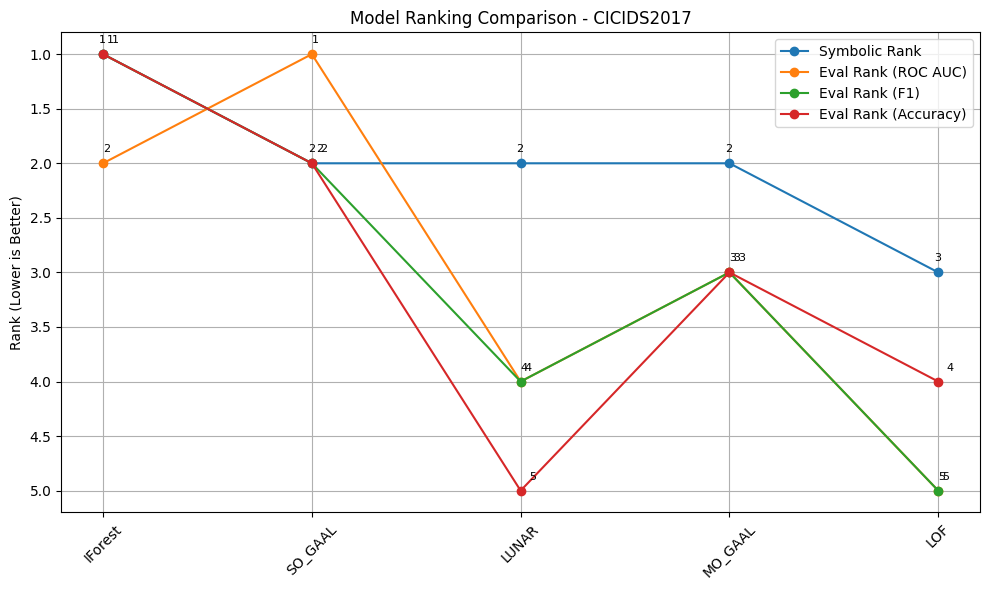

In [44]:
# generate_llm_analysis_report("CICIDS2017", api_key="api_key")
# Generate and display ranking plot
plot_path = generate_model_ranking_graph("CICIDS2017")

In [45]:
# Load evaluated results file
dataset_name = "CICIDS2017"  # change as needed
df = pd.read_csv(f"outputs/llm_inputs/{dataset_name}_llm_input.csv")

# Recalculate ranks if not already present or incorrect
df["Symbolic Rank"] = df["Symbolic Score"].rank(method="dense", ascending=False).astype(int)
df["Eval Rank (ROC AUC)"] = df["ROC AUC"].rank(method="dense", ascending=False).astype(int)
df["Eval Rank (F1)"] = df["F1 (Minority)"].rank(method="dense", ascending=False).astype(int)
df["Eval Rank (Accuracy)"] = df["Accuracy"].rank(method="dense", ascending=False).astype(int)
df["Eval Rank (AP)"] = df["Average Precision"].rank(method="dense", ascending=False).astype(int)

# Clean up any duplicate columns (if any)
df = df.loc[:, ~df.columns.duplicated()]

# Select relevant columns
cols_to_display = [
    "Model", "Symbolic Score", "Symbolic Rank",
    "ROC AUC", "Eval Rank (ROC AUC)",
    "F1 (Minority)", "Eval Rank (F1)",
    "Accuracy", "Eval Rank (Accuracy)",
    "Average Precision", "Eval Rank (AP)"
]
df_display = df[cols_to_display].sort_values("Symbolic Rank")

# Display the table
print(f"📊 Model Evaluation Summary for {dataset_name}")
display(df_display)

# Save as CSV
df_display.to_csv(f"outputs/llm_inputs/{dataset_name}_evaluation_summary.csv", index=False)

# Save as Markdown for report (optional)
with open(f"outputs/llm_outputs/{dataset_name}_evaluation_summary.md", "w") as f:
    f.write(df_display.to_markdown(index=False))


📊 Model Evaluation Summary for CICIDS2017


,Model,Symbolic Score,Symbolic Rank,ROC AUC,Eval Rank (ROC AUC),F1 (Minority),Eval Rank (F1),Accuracy,Eval Rank (Accuracy),Average Precision,Eval Rank (AP)
0,IForest,4.2,1,0.7059,2,0.2932,1,0.7984,1,0.3222,2
1,SO_GAAL,3.1,2,0.7198,1,0.2732,2,0.7933,2,0.3386,1
2,LUNAR,3.1,2,0.4782,4,0.1620,4,0.7610,5,0.1907,4
3,MO_GAAL,3.1,2,0.5793,3,0.2467,3,0.7852,3,0.2744,3
4,LOF,2.0,3,0.4607,5,0.1464,5,0.7652,4,0.1871,5


In [46]:
# 🔷 prompt to guide the LLM response professionally
prompt_template = {
    "task": (
        "You are a senior data scientist reviewing the results of an automated anomaly detection pipeline. "
        "Given symbolic model scores, evaluation metrics, and summary visuals, your task is to professionally interpret the findings "
        "and recommend the most suitable model for deployment. Please ensure the response is confident, structured, and highlights the system's strengths."
    ),
    "comment": [
        "Provide an executive summary for the dataset {{dataset_name}}.",
        "Summarize symbolic and empirical performance evaluations.",
        "Confirm that the symbolic scoring has successfully prioritized high-performing models.",
        "Use the summary table and heatmap to justify the top recommended model(s).",
        "Focus on explaining why the recommended model is suitable for the dataset.",
        "Avoid highlighting weaknesses of the scoring logic unless absolutely necessary."
    ],
    "next_steps": [
        "List preprocessing suggestions, if applicable (e.g., normalization, feature scaling).",
        "Optionally suggest dimensionality reduction if warranted by the dataset structure.",
        "Provide hyperparameter tuning guidance for the recommended model(s)."
    ],
    "report_structure": [
        "Heading: LLM Analysis & Model Recommendation for {{dataset_name}} Dataset",
        "Overview Summary for {{dataset_name}}",
        "Comparison of Symbolic vs. Actual Scores",
        "Model Suitability Summary Table for {{dataset_name}}",
        "Model Evaluation Heatmap for {{dataset_name}}",
        "Analysis of Summary Table and Heatmap",
        "LLM Recommendations and Justification for Model Selection",
        "Suggested Preprocessing Steps for {{dataset_name}}",
        "Hyperparameter Tuning Recommendations",
        "Final Professional Recommendation"
    ]
}

# ✅ Save this prompt template for use in the report generator
with open("prompt_template.json", "w", encoding="utf-8") as f:
    json.dump(prompt_template, f, indent=4)

print("✅ Prompt template saved successfully.")


✅ Prompt template saved successfully.


**Heatmap not sorted**

In [47]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Define file paths and dataset name
# dataset_name = "CICIDS2017"  # Replace accordingly
# output_path = "outputs/llm_outputs"
# os.makedirs(output_path, exist_ok=True)

# # Load the data
# llm_input_df = pd.read_csv(f"outputs/llm_inputs/{dataset_name}_llm_input.csv")

# # Define rank columns
# rank_cols = ["Symbolic Rank", "Eval Rank (ROC AUC)", "Eval Rank (Accuracy)", "Eval Rank (F1)"]

# # Create heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(
#     llm_input_df.set_index("Model")[rank_cols],
#     annot=True,
#     cmap="YlGnBu",
#     cbar_kws={'label': 'Rank (Lower is Better)'}
# )
# plt.title(f"Model Evaluation Heatmap - {dataset_name}")
# plt.ylabel("Model")
# plt.xlabel("Evaluation Metric")
# plt.tight_layout()

# # Save the heatmap
# heatmap_path = os.path.abspath(f"{output_path}/{dataset_name}_rank_heatmap.png")
# plt.savefig(heatmap_path, bbox_inches="tight")
# plt.close()

# print(f"✅ Heatmap saved at: {heatmap_path}")



**Standalone Sorted Heatmap generation**

In [48]:
# # Sort the DataFrame by multiple ranking columns to resolve ties smartly
# llm_input_df_sorted = llm_input_df.sort_values(
#     by=["Symbolic Rank", "Eval Rank (ROC AUC)", "Eval Rank (Accuracy)", "Eval Rank (F1)"],
#     ascending=True
# )

# # Then use this sorted DataFrame in the heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(
#     llm_input_df_sorted.set_index("Model")[rank_cols],
#     annot=True,
#     cmap="YlGnBu",
#     cbar_kws={'label': 'Rank (Lower is Better)'}
# )
# plt.title(f"Model Evaluation Heatmap - {dataset_name}")
# plt.ylabel("Model")
# plt.xlabel("Evaluation Metric")
# plt.tight_layout()

# # Save again with sorted order
# heatmap_path = os.path.abspath(f"{output_path}/{dataset_name}_rank_heatmap_sorted.png")
# plt.savefig(heatmap_path, bbox_inches="tight")
# plt.close()

# print(f"✅ Sorted heatmap saved at: {heatmap_path}")


**Final Code**

In [49]:
def generate_llm_analysis_report(dataset_name: str, api_key: str):
    
    from openai import OpenAI    

    client = OpenAI(api_key=api_key)
    base_path = "outputs/llm_inputs"
    output_path = "outputs/llm_outputs"
    os.makedirs(output_path, exist_ok=True)

    # Load input data
    llm_input_df = pd.read_csv(f"{base_path}/{dataset_name}_llm_input.csv")
    dynamic_files = {
        "llm_input_data": llm_input_df.to_dict(orient="records"),
        "llm_input_meta": json.load(open(f"{base_path}/{dataset_name}_llm_input_meta.json")),
        "dataset_tags": json.load(open(f"{base_path}/{dataset_name}_tags.json"))
    }

    # Load static context
    static_context = {
        name.replace(".json", ""): json.load(open(os.path.join(base_path, name)))
        for name in [
            "model_tag_knowledge.json", "model_tag_knowledge_meta.json",
            "symbolic_score_formula.json", "tag_definitions.json",
            "tag_definitions_meta.json", "tag_weights.json",
            "tag_weights_meta.json", "basic_eda_steps.json"
        ]
    }

    # Rename columns and reorder
    llm_input_df = llm_input_df.rename(columns={
        "Eval Rank (F1)": "F1 Rank",
        "Eval Rank (Accuracy)": "Accuracy Rank",
        "Eval Rank (Average Precision)": "AP Rank",
        "Eval Rank (ROC AUC)": "AUC Rank"
    })
    desired_column_order = [
        "Model", "Symbolic Rank", "Symbolic Score",
        "ROC AUC", "Accuracy", "Average Precision", "F1 (Minority)",
        "Precision (Minority)", "Recall (Minority)",
        "AUC Rank", "Accuracy Rank", "AP Rank", "F1 Rank"
    ]
    llm_input_df = llm_input_df[[col for col in desired_column_order if col in llm_input_df.columns]]

    # Save clean markdown table
    table_md = llm_input_df.to_markdown(index=False, tablefmt="github")

    # Table image
    fig, ax = plt.subplots(figsize=(12, 2 + 0.5 * len(llm_input_df)))
    ax.axis("off")
    ax.set_title(f"{dataset_name} - Model Evaluation Summary Table", fontsize=12, weight='bold', pad=20)
    tbl = ax.table(cellText=llm_input_df.values,
                   colLabels=llm_input_df.columns,
                   cellLoc='center', loc='center')
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(9)
    tbl.scale(1, 1.5)
    plt.tight_layout()
    table_image_path = os.path.abspath(f"{output_path}/{dataset_name}_summary_table.png")
    plt.savefig(table_image_path, bbox_inches='tight')
    plt.close()

    # Line plot (still generated)
    metrics = ["Symbolic Rank", "AUC Rank", "Accuracy Rank", "F1 Rank"]
    plt.figure(figsize=(10, 6))
    for _, row in llm_input_df.iterrows():
        plt.plot(metrics, [row.get(m, float('nan')) for m in metrics], marker='o', label=row["Model"])
        for i, m in enumerate(metrics):
            val = row.get(m)
            if pd.notna(val):
                plt.text(i, val + 0.1, str(int(val)), ha='center', fontsize=8)
    #plt.title(f"Model Ranking Line Plot for {dataset_name}")
    plt.title(f"{dataset_name} - Model Ranking Line Plot", fontsize=12, weight='bold', pad=20)

    
    plt.ylabel("Rank (Lower is Better)")
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)
    plt.tight_layout()
    line_plot_path = os.path.abspath(f"{output_path}/{dataset_name}_rank_lineplot.png")
    plt.savefig(line_plot_path, bbox_inches="tight")
    plt.close()

    # Sorted heatmap
    rank_cols = ["Symbolic Rank", "AUC Rank", "Accuracy Rank", "F1 Rank"]
    llm_input_df_sorted = llm_input_df.sort_values(by=rank_cols, ascending=True)
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        llm_input_df_sorted.set_index("Model")[rank_cols],
        annot=True,
        cmap="YlGnBu",
        cbar_kws={'label': 'Rank (Lower is Better)'}
    )
    #plt.title(f"Model Evaluation Heatmap - {dataset_name}")
    plt.title(f"{dataset_name} - Model Evaluation Heatmap", fontsize=12, weight='bold', pad=20)

    
    plt.ylabel("Model")
    plt.xlabel("Evaluation Metric")
    plt.tight_layout()
    heatmap_path = os.path.abspath(f"{output_path}/{dataset_name}_rank_heatmap_sorted.png")
    plt.savefig(heatmap_path, bbox_inches="tight")
    plt.close()

    # Load prompt template
    with open("prompt_template.json") as f:
        prompt_template = json.load(f)

    # Prepare LLM prompt
    prompt = {
        "dataset_name": dataset_name,
        **prompt_template,
        **dynamic_files,
        **static_context
    }

    # Call LLM
    response = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "You are a machine learning analyst and audit assistant."},
            {"role": "user", "content": json.dumps(prompt)}
        ],
        temperature=0.3
    )
    report_text = response.choices[0].message.content
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Save markdown
    report_path_md = os.path.join(output_path, f"{dataset_name}_llm_report_{timestamp}.md")
    final_md = (
        f"# Model Evaluation Summary Table for {dataset_name}\n\n"
        f"![Summary Table](file:///{table_image_path.replace(os.sep, '/')})\n\n---\n\n"
        f"## Model Evaluation Heatmap for {dataset_name}\n\n"
        f"![Heatmap](file:///{heatmap_path.replace(os.sep, '/')})\n\n---\n\n"
        f"## LLM Analysis and Recommendations for {dataset_name}\n\n{report_text}"
    )

    with open(report_path_md, "w", encoding="utf-8") as f:
        f.write(final_md)
    print(f"✅ Markdown saved: {report_path_md}")

    # Convert to PDF
    report_path_pdf = report_path_md.replace(".md", ".pdf")
    try:
        config = pdfkit.configuration(wkhtmltopdf=r"C:\Program Files\wkhtmltopdf\bin\wkhtmltopdf.exe")
        html_text = markdown2.markdown(final_md)
        pdfkit.from_string(html_text, report_path_pdf, configuration=config,
                           options={"enable-local-file-access": ""})
        print(f"📄 PDF report saved: {report_path_pdf}")
    except Exception as e:
        print(f"❌ Failed to convert to PDF: {e}")

    return report_path_md, report_path_pdf


In [50]:
generate_llm_analysis_report("CICIDS2017", api_key=api_key)

✅ Markdown saved: outputs/llm_outputs\CICIDS2017_llm_report_20250625_205122.md
❌ Failed to convert to PDF: wkhtmltopdf reported an error:
Exit with code 1 due to network error: ContentNotFoundError



('outputs/llm_outputs\\CICIDS2017_llm_report_20250625_205122.md',
 'outputs/llm_outputs\\CICIDS2017_llm_report_20250625_205122.pdf')

In [51]:
# def generate_llm_analysis_report_batch(api_key: api_key, dataset_list: list):
#     """
#     Run LLM report generation for multiple datasets.
#     """
#     for dataset_name in dataset_list:
#         print(f"\n🔄 Processing dataset: {dataset_name}")
#         try:
#             md_path, pdf_path = generate_llm_analysis_report(dataset_name, api_key=api_key)
#             print(f"✅ Markdown saved: {md_path}")
#             print(f"📄 PDF report saved: {pdf_path}")
#         except Exception as e:
#             print(f"❌ Failed for {dataset_name}: {e}")


In [52]:
# api_key = api_key  # Replace with your actual OpenAI API key

# datasets = ["cardio", "ionosphere"]  # List your datasets
# generate_llm_analysis_report_batch(api_key, datasets)

In [53]:
def generate_llm_analysis_report_batch(api_key: str, dataset_list: list):
    log_file = f"llm_batch_log_{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt"
    logging.basicConfig(filename=log_file, level=logging.INFO, format='%(asctime)s - %(message)s')
    
    results = []

    print(f"📁 Log file: {log_file}")
    print("🚀 Starting batch report generation...\n")

    for dataset_name in tqdm(dataset_list, desc="Generating Reports", unit="dataset"):
        logging.info(f"Processing dataset: {dataset_name}")
        try:
            md_path, pdf_path = generate_llm_analysis_report(dataset_name, api_key=api_key)
            print(f"\n✅ Completed: {dataset_name}")
            print(f"   📄 PDF: {pdf_path}")
            logging.info(f"SUCCESS: {dataset_name} - PDF saved at {pdf_path}")
            results.append({"Dataset": dataset_name, "Status": "Success", "PDF": pdf_path})
        except Exception as e:
            print(f"\n❌ Error: {dataset_name} - {e}")
            logging.error(f"FAILURE: {dataset_name} - {e}")
            results.append({"Dataset": dataset_name, "Status": "Failed", "Error": str(e)})

    # Summary Table
    print("\n📊 Batch Report Summary")  
    summary_df = pd.DataFrame(results)
    from IPython.display import display
    display(summary_df)


In [54]:
api_key = api_key  # Replace with your actual OpenAI API key

datasets = ["cardio", "ionosphere"]  # List your datasets
generate_llm_analysis_report_batch(api_key, datasets)

📁 Log file: llm_batch_log_20250625_205123.txt
🚀 Starting batch report generation...



Generating Reports:   0%|                                                                   | 0/2 [00:00<?, ?dataset/s]

✅ Markdown saved: outputs/llm_outputs\cardio_llm_report_20250625_205204.md


Generating Reports:  50%|█████████████████████████████▌                             | 1/2 [00:41<00:41, 41.85s/dataset]

❌ Failed to convert to PDF: wkhtmltopdf reported an error:
Exit with code 1 due to network error: ContentNotFoundError


✅ Completed: cardio
   📄 PDF: outputs/llm_outputs\cardio_llm_report_20250625_205204.pdf
✅ Markdown saved: outputs/llm_outputs\ionosphere_llm_report_20250625_205306.md


Generating Reports: 100%|███████████████████████████████████████████████████████████| 2/2 [01:43<00:00, 51.93s/dataset]

❌ Failed to convert to PDF: wkhtmltopdf reported an error:
Exit with code 1 due to network error: ContentNotFoundError


✅ Completed: ionosphere
   📄 PDF: outputs/llm_outputs\ionosphere_llm_report_20250625_205306.pdf

📊 Batch Report Summary


,Dataset,Status,PDF
0,cardio,Success,outputs/llm_outputs\cardio_llm_report_20250625_205204.pdf
1,ionosphere,Success,outputs/llm_outputs\ionosphere_llm_report_20250625_205306.pdf
